# HRV EDA

In [78]:
import importlib
import project_utils.deciles as deciles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
from general_utils.OverallDetailComparisonPlot import OverallDetailComparisonPlot
import os
import pandas as pd

utils.default_plot_format()
utils.pd_display_settings(3)

Predefine where data is and where the plotly images will be saved

In [79]:
import matplotlib as mpl
import plotly.express as px
palette = px.colors.qualitative.Plotly
palette, _ = px.colors.convert_colors_to_same_type(palette, colortype='tuple')
palette = [mpl.colors.rgb2hex(color) for color in palette]
px.defaults.color_discrete_sequence = palette
sns.set_palette(sns.color_palette(palette))
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
sns.set_context("notebook", rc={"axes.labelweight": "bold"})
mpl.rcParams['scatter.marker'] = 'o'
mpl.rcParams['lines.markersize'] = 20

In [80]:
#data_path = r'processed_data\5min_nabian_2025_03_03.pkl'
data_path = r"processed_data\raw_metrics\processed_10min_Nabian.pkl"
#data_path = "processed_data/manual_10min_2025_03_03.pkl"
#data_path = r'processed_data\raw_metrics\optimized_20min_Nabian.pkl'
title_addon = " (10 min segments)"

In [81]:
pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]
data.tail()

t_start  t_end   SDRR  RMSSD  pNN50 (%)  Mean HR (bpm)  ULF Power  \
3250    22212  22812  30.89  24.63       3.13          79.80   2.35e-08   
3251    21611  22211  40.47  34.10      13.03          77.50   1.07e-08   
3252    21010  21610  38.71  41.98      27.34          75.71   1.28e-09   
3253    34218  34818  88.51  31.71      12.61          79.37   1.33e-08   
3254    76304  76903 173.75 220.18      22.22          74.74   3.17e-09   

      ULF Peak Frequency  ULF Peak Power  VLF Power  ...  UCr (g)  \
3250                   0        1.61e-05   4.24e-06  ...     7.26   
3251                   0        9.96e-06   2.39e-06  ...     7.26   
3252             0.00167        1.49e-06   3.11e-06  ...     7.26   
3253             0.00167        1.59e-05   3.19e-06  ...     7.26   
3254             0.00167        3.57e-06    1.2e-06  ...    10.23   

      UACR (mg÷g)  Complications  Nephropathy  Retinopathy and cataract   DPN  \
3250         2.88              1            1                         0  True   
3251         2.88              1            1                         0  True   
3252         2.88              1            1                         0  True   
3253         2.88              1            1                         0  True   
3254         0.43              1            0                         0  True   

      Heart Disease  atherosclerosis or stenosis  Carotid Plaque  Condition  
3250              0                            0               1        DPN  
3251              0                            0               1        DPN  
3252              0                            0               1        DPN  
3253              0                            0               1        DPN  
3254              0                            0               1        DPN  

[5 rows x 63 columns]

In [82]:
", ".join(indicator_columns)

'SDRR, RMSSD, pNN50 (%), Mean HR (bpm), VLF Power, VLF Peak Frequency, LF Power, LF Peak Frequency, HF Power, HF Peak Frequency, LF÷HF Ratio, S, SD1, SD2, SD1÷SD2, ApEn, SampEn, DFA α1, DFA α2, D2'

# Illustration of all data

In [83]:
# Normalize the data for each metric in indicator_columns
normalized_data = data.copy()
for metric in indicator_columns:
    values = normalized_data[metric]
    min_val, max_val = values.min(), values.max()
    if min_val != max_val:  # Avoid division by zero
        normalized_data[metric] = (values - min_val) / (max_val - min_val)
    else:
        normalized_data[metric] = 0  # Assign 0 if all values are the same

display(normalized_data[indicator_columns].describe())
normalized_melted = deciles.produce_median_melt(normalized_data, indicator_columns)
data = data[abs(data.D2)<50]

SDRR  RMSSD  pNN50 (%)  Mean HR (bpm)  VLF Power  VLF Peak Frequency  \
count  3210   3210       3210           3210       3210                3210   
mean   0.26   0.20       0.14           0.37     0.0464                0.73   
std    0.20   0.19       0.19           0.16       0.09                0.19   
min       0      0          0              0          0                   0   
25%    0.12 0.0539     0.0113           0.26    0.00489                0.59   
50%    0.21   0.13     0.0606           0.36     0.0142                0.77   
75%    0.35   0.27       0.18           0.48     0.0474                0.91   
max       1      1          1              1          1                   1   

       LF Power  LF Peak Frequency  HF Power  HF Peak Frequency  LF÷HF Ratio  \
count      3210               3210      3210               3210         3210   
mean       0.11               0.64      0.27               0.73       0.0724   
std        0.12               0.30      0.16               0.23       0.0802   
min           0                  0         0                  0            0   
25%      0.0421               0.41      0.15               0.56       0.0307   
50%       0.069               0.72      0.24               0.78       0.0466   
75%        0.12               0.91      0.37               0.92       0.0808   
max           1                  1         1                  1            1   

            S    SD1  SD2  SD1÷SD2  ApEn  SampEn  DFA α1  DFA α2     D2  
count    3210   3210 3210     3210  3210    3210    3210    3210   2657  
mean   0.0981   0.20 0.29     0.35  0.56    0.34    0.47    0.40   0.79  
std      0.16   0.19 0.20     0.17  0.21    0.17    0.16    0.15 0.0195  
min         0      0    0        0     0       0       0       0      0  
25%   0.00946 0.0539 0.14     0.21  0.39    0.21    0.34    0.28   0.79  
50%    0.0346   0.13 0.24     0.36  0.58    0.33    0.43    0.38   0.79  
75%      0.11   0.27 0.39     0.47  0.73    0.46    0.58    0.50   0.80  
max         1      1    1        1     1       1       1       1      1

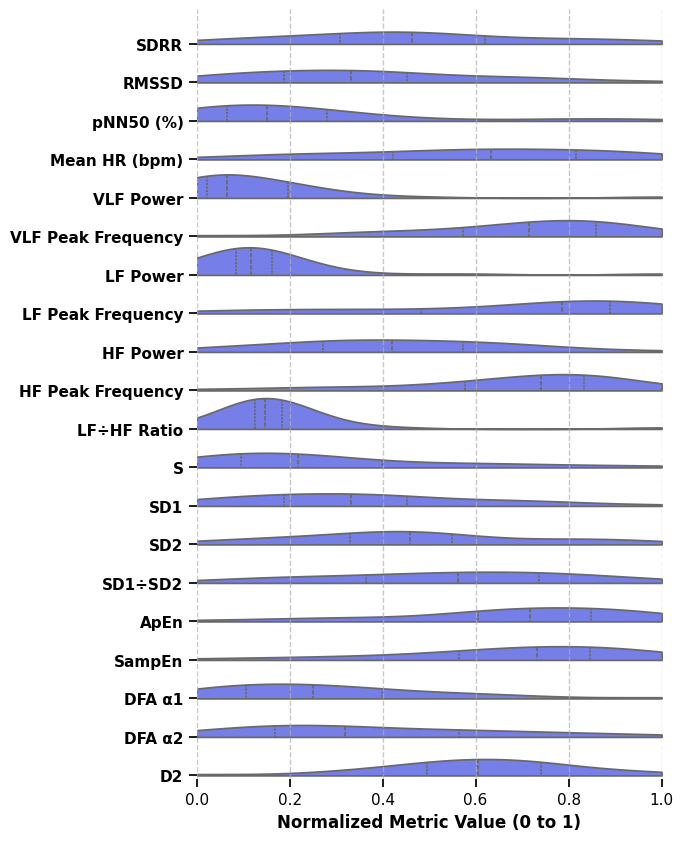

In [84]:
# Normalize the data for each metric
normalized_data = deciles.produce_median_melt(data, indicator_columns)

# Normalize values for each metric
for metric in normalized_data['metric'].unique():
    mask = normalized_data['metric'] == metric
    values = normalized_data.loc[mask, 'value']
    normalized_data.loc[mask, 'value'] = (values - values.min()) / (values.max() - values.min())

# Plot the vertical violin plot
plt.figure(figsize=(6, 10))
ax = sns.violinplot(
    data=normalized_data, 
    y='metric', 
    x='value', 
    split=True, 
    inner='quartile', 
    cut=0
)


plt.title(None)
plt.xlabel('Normalized Metric Value (0 to 1)')
plt.ylabel(None)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust y-ticks and remove unnecessary spines
ax.set_yticks([tick + 0.4 for tick in ax.get_yticks()])


for label in ax.get_yticklabels():
    label.set_fontweight('bold')

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)


plt.show()

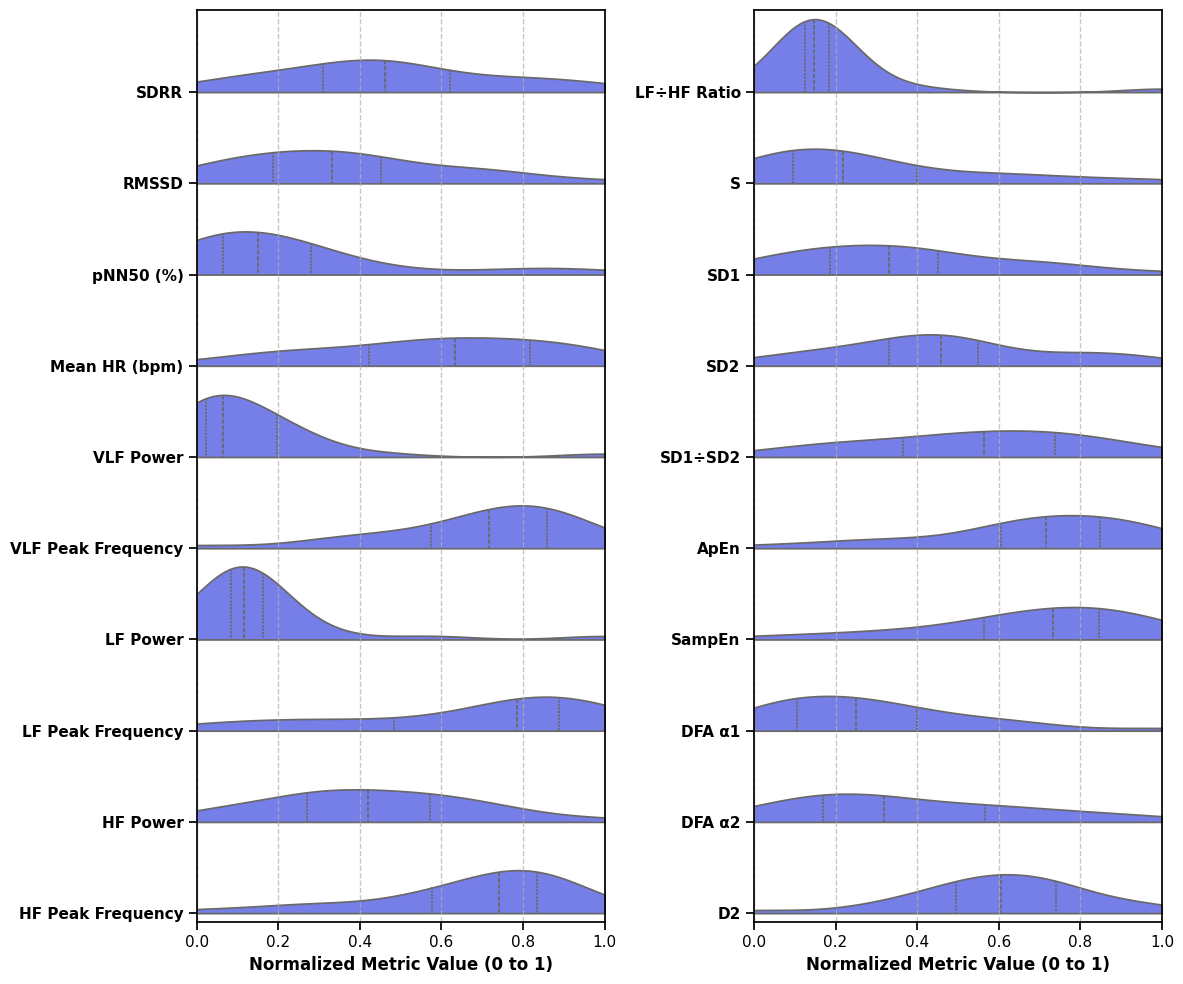

In [85]:
def plot_violin(data, metrics, ax, title):
    sns.violinplot(
        data=data[data['metric'].isin(metrics)],
        y='metric',
        x='value',
        split=True,
        inner='quartile',
        cut=0,
        ax=ax
    )
    plt.xlim([0,1])
    ax.set_title(None)
    ax.set_xlabel('Normalized Metric Value (0 to 1)')
    ax.set_ylabel(None)
    ax.grid(axis='x', linestyle='--', alpha=0.7)


    ax.set_yticks([tick + 0.4 for tick in ax.get_yticks()])


    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

# Split metrics into two groups
mid_index = len(normalized_data['metric'].unique()) // 2
left_metrics = normalized_data['metric'].unique()[:mid_index]
right_metrics = normalized_data['metric'].unique()[mid_index:]

# Create a figure with two horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 10), sharex=True)

# Plot the left metrics
plot_violin(normalized_data, left_metrics, axes[0], 'Left Metrics')

# Plot the right metrics
plot_violin(normalized_data, right_metrics, axes[1], 'Right Metrics')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Median only comparison:
We first derive median of each metric and put them into a single df

In [86]:
median_melted = deciles.produce_median_melt(data, indicator_columns)

median_melted.tail(3)

id   DPN metric  value
517  38  True     D2  -2.16
518  39  True     D2  -3.26
519  40  True     D2  -2.75

In [87]:
from general_utils import CorrectedMultivariableTest as CMT

importlib.reload(CMT)


test = CMT.CorrectedMultivariableTest(
    data=median_melted, 
    group_col='metric',
    value_col='value',
    cat_col='DPN',
    cat_val_1=False,
    cat_val_2=True
)


result = test.perform_ManWhitney_U_tests()
result.sort_values('p_value', inplace=True)
display(result)
result.reset_index(inplace=True, drop=False)

U_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                      
LF Power                     75    0.026         True    20          0.05   
HF Power                     73   0.0395         True    19        0.0475   
S                            68   0.0959        False    18         0.045   
VLF Peak Frequency           67     0.11        False    16          0.04   
SD1                          67     0.11        False    17        0.0425   
RMSSD                        67     0.11        False    15        0.0375   
SDRR                         66     0.13        False    14         0.035   
SD2                          65     0.15        False    13        0.0325   
Mean HR (bpm)                24     0.17        False    12          0.03   
pNN50 (%)                    63     0.20        False    10         0.025   
DFA α2                       25     0.20        False    11        0.0275   
SD1÷SD2                      60     0.28        False     9        0.0225   
LF Peak Frequency            59     0.32        False     7        0.0175   
SampEn                       59     0.32        False     8          0.02   
ApEn                         56     0.43        False     6         0.015   
HF Peak Frequency            34     0.51        False     5        0.0125   
DFA α1                       36     0.61        False     4          0.01   
D2                           49     0.76        False     3        0.0075   
VLF Power                    39     0.76        False     2         0.005   
LF÷HF Ratio                  41     0.86        False     1        0.0025   

                    BH_Significant  
metric                              
LF Power                      True  
HF Power                      True  
S                            False  
VLF Peak Frequency           False  
SD1                          False  
RMSSD                        False  
SDRR                         False  
SD2                          False  
Mean HR (bpm)                False  
pNN50 (%)                    False  
DFA α2                       False  
SD1÷SD2                      False  
LF Peak Frequency            False  
SampEn                       False  
ApEn                         False  
HF Peak Frequency            False  
DFA α1                       False  
D2                           False  
VLF Power                    False  
LF÷HF Ratio                  False

In [88]:
result[result['p_value'] < 0.1].index

Index([0, 1, 2], dtype='int64')

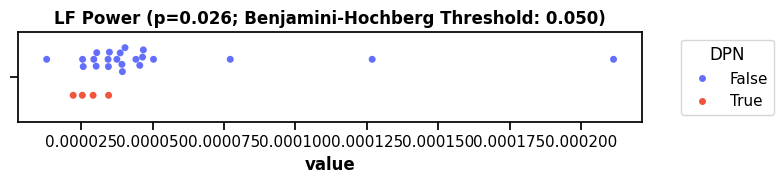

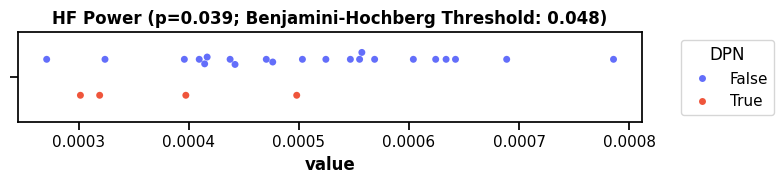

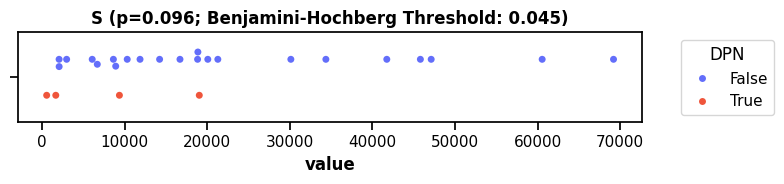

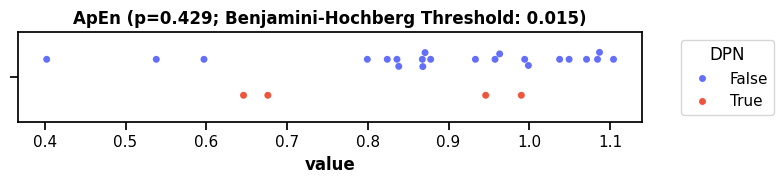

In [89]:
for i, row in result.iterrows():
    if row['p_value'] < 0.1 or (row['metric'] == 'ApEn'):
        title = f"{row['metric']} (p={row['p_value']:.3f}; Benjamini-Hochberg Threshold: {row['BH_threshold']:.3f})"
        plt.figure(figsize=(8, 2))
        plt.title(title)
        sns.swarmplot(
            data=median_melted[median_melted['metric'] == row['metric']],  
            hue = 'DPN',
            x='value',
            dodge=True
        )
        # Move legend outside the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='DPN')
        plt.tight_layout()

# MEDIAN ABSOLUTE DEVIATION

In [90]:
def normalize_melt(df):
    df = df[df.metric!='D2']
    for metric in df["metric"].unique():
        mask = df["metric"]==metric
        values = df[df["metric"]==metric]["value"]
        df.loc[mask, "value"] = values / values.max()

    return df


def plot_normalized(df, title=None, figsize=(8, 15)):
    plt.figure(figsize=figsize)
    sns.swarmplot(data=df, y='metric', x='value', hue = 'DPN', size=4)
    plt.title(title)
    plt.show()

In [91]:
# Mad values
import scipy.stats as stats
import numpy as np


mad=data.groupby(["id", 'DPN'])[indicator_columns].agg(stats.median_abs_deviation)
mad_melt = mad.reset_index().melt(id_vars=["id", 'DPN'], value_vars=indicator_columns, var_name='metric', value_name = 'value')
display(mad_melt)

id    DPN metric  value
0     0  False   SDRR  18.24
1     3  False   SDRR  24.69
2     4  False   SDRR  27.50
3     5  False   SDRR  15.66
4     7  False   SDRR  31.56
..   ..    ...    ...    ...
515  35  False     D2   0.30
516  37   True     D2   3.38
517  38   True     D2   0.74
518  39   True     D2   1.04
519  40   True     D2   1.17

[520 rows x 4 columns]

In [92]:
test = CMT.CorrectedMultivariableTest(
    data=mad_melt, 
    group_col='metric',
    value_col='value',
    cat_col='DPN',
    cat_val_1=False,
    cat_val_2=True
)


result = test.perform_ManWhitney_U_tests()
result.sort_values('p_value', inplace=True)
display(result)
result.reset_index(inplace=True, drop=False)

U_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                      
ApEn                         15   0.0395         True    20          0.05   
DFA α1                       20   0.0959        False    18         0.045   
DFA α2                       20   0.0959        False    19        0.0475   
VLF Peak Frequency           20   0.0959        False    17        0.0425   
LF Peak Frequency            21     0.11        False    16          0.04   
D2                           23     0.15        False    15        0.0375   
SD1÷SD2                      25     0.20        False    14         0.035   
S                            63     0.20        False    13        0.0325   
SD1                          62     0.22        False    12          0.03   
RMSSD                        62     0.22        False    11        0.0275   
pNN50 (%)                    61     0.25        False    10         0.025   
SampEn                       28     0.28        False     9        0.0225   
LF Power                     59     0.32        False     8          0.02   
LF÷HF Ratio                  30     0.35        False     6         0.015   
SD2                          58     0.35        False     7        0.0175   
SDRR                         56     0.43        False     5        0.0125   
Mean HR (bpm)                33     0.47        False     4          0.01   
HF Power                     54     0.51        False     3        0.0075   
VLF Power                    36     0.61        False     2         0.005   
HF Peak Frequency            46     0.92        False     1        0.0025   

                    BH_Significant  
metric                              
ApEn                          True  
DFA α1                       False  
DFA α2                       False  
VLF Peak Frequency           False  
LF Peak Frequency            False  
D2                           False  
SD1÷SD2                      False  
S                            False  
SD1                          False  
RMSSD                        False  
pNN50 (%)                    False  
SampEn                       False  
LF Power                     False  
LF÷HF Ratio                  False  
SD2                          False  
SDRR                         False  
Mean HR (bpm)                False  
HF Power                     False  
VLF Power                    False  
HF Peak Frequency            False

In [93]:
result[result.p_value<0.1].index

Index([0, 1, 2, 3], dtype='int64')

In [94]:
#to_plot = [x for x in time_metrics if x != "S"]
#figsize = (8, 5)
#plot_normalized(normalize_melt(mad_melt[mad_melt["metric"].isin(to_plot )]), "Normalized Median Absolute Deviation Distribution", figsize)
#plot_normalized(normalize_melt(median_melted[median_melted["metric"].isin(to_plot )]), "Normalized Median Distribution", figsize)

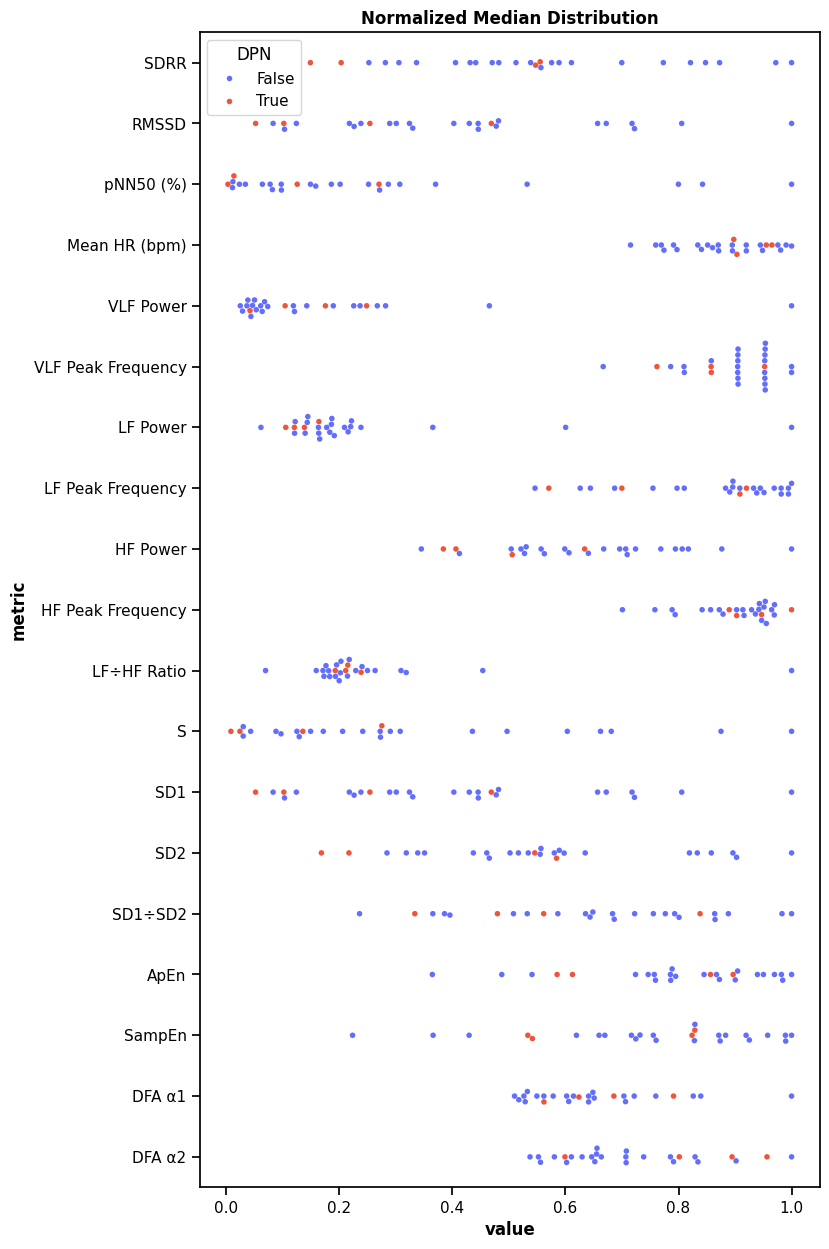

In [95]:
plot_normalized(normalize_melt(median_melted), "Normalized Median Distribution")

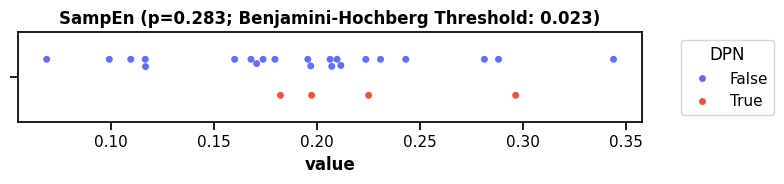

In [96]:
for i, row in result.iterrows():
    if  row["metric"]=="SampEn":
        title = f"{row['metric']} (p={row['p_value']:.3f}; Benjamini-Hochberg Threshold: {row['BH_threshold']:.3f})"
        plt.figure(figsize=(8, 2))
        plt.title(title)
        sns.swarmplot(
            data=mad_melt[mad_melt['metric'] == row['metric']],  
            hue = 'DPN',
            x='value',
            dodge=True
        )
        # Move legend outside the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='DPN')
        plt.tight_layout()

# Permutations test

In [97]:
stats.permutation_test

<function scipy.stats._resampling.permutation_test(data, statistic, *, permutation_type='independent', vectorized=None, n_resamples=9999, batch=None, alternative='two-sided', axis=0, random_state=None)>

## Permutation test

In [98]:
importlib.reload(CMT)
import numpy as np
from copy import deepcopy

test = CMT.CorrectedMultivariableTest(
    data=median_melted, 
    group_col='metric',
    value_col='value',
    cat_col='DPN',
    cat_val_1=True,
    cat_val_2=False
)

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

result = test.permutation_test(statistic, n_permutations=100000)

result.sort_values('p_value', inplace=True)
to_print = deepcopy(result)
to_print.drop(columns=["distribution"], inplace=True)
display(to_print)


perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                         
HF Power                 -0.000134   0.0424         True    20          0.05   
SD2                         -38.47   0.0618        False    19        0.0475   
LF Power                 -2.23e-05   0.0622        False    18         0.045   
SDRR                        -32.58   0.0736        False    17        0.0425   
SD1                         -28.47   0.0926        False    16          0.04   
RMSSD                       -40.27   0.0926        False    15        0.0375   
S                        -15000.94   0.0962        False    14         0.035   
DFA α2                        0.14     0.11        False    13        0.0325   
Mean HR (bpm)                 4.97     0.18        False    12          0.03   
pNN50 (%)                    -6.87     0.24        False    11        0.0275   
D2                           -0.67     0.25        False    10         0.025   
LF Peak Frequency          -0.0123     0.26        False     9        0.0225   
VLF Peak Frequency        -0.00163     0.29        False     8          0.02   
SD1÷SD2                    -0.0908     0.31        False     7        0.0175   
HF Peak Frequency           0.0152     0.33        False     6         0.015   
ApEn                       -0.0763     0.44        False     5        0.0125   
SampEn                     -0.0858     0.47        False     4          0.01   
DFA α1                       0.024     0.73        False     3        0.0075   
LF÷HF Ratio                -0.0151     0.86        False     2         0.005   
VLF Power                -6.24e-07     0.92        False     1        0.0025   

                    BH_Significant  
metric                              
HF Power                      True  
SD2                          False  
LF Power                     False  
SDRR                         False  
SD1                          False  
RMSSD                        False  
S                            False  
DFA α2                       False  
Mean HR (bpm)                False  
pNN50 (%)                    False  
D2                           False  
LF Peak Frequency            False  
VLF Peak Frequency           False  
SD1÷SD2                      False  
HF Peak Frequency            False  
ApEn                         False  
SampEn                       False  
DFA α1                       False  
LF÷HF Ratio                  False  
VLF Power                    False

In [99]:
result[result.p_value<0.1].index

Index(['HF Power', 'SD2', 'LF Power', 'SDRR', 'SD1', 'RMSSD', 'S'], dtype='object', name='metric')

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                               
HF Power       -0.000134   0.0424         True    20          0.05   

          BH_Significant  
metric                    
HF Power            True

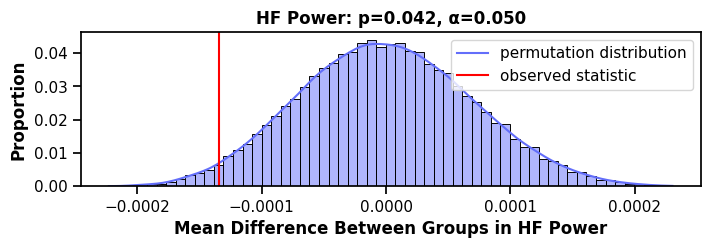

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
SD2             -38.47   0.0618        False    19        0.0475   

        BH_Significant  
metric                  
SD2              False

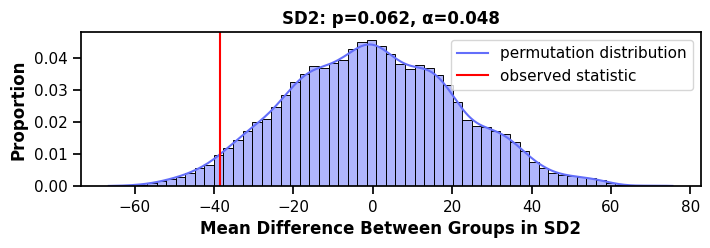

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                               
LF Power       -2.23e-05   0.0622        False    18         0.045   

          BH_Significant  
metric                    
LF Power           False

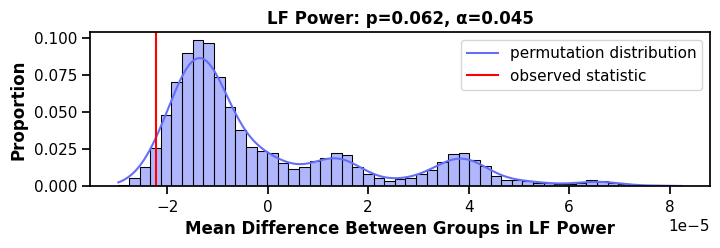

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
SDRR            -32.58   0.0736        False    17        0.0425   

        BH_Significant  
metric                  
SDRR             False

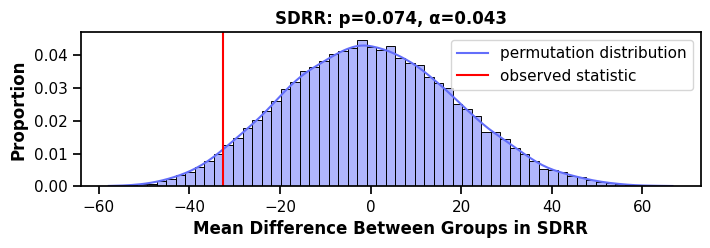

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
SD1             -28.47   0.0926        False    16          0.04   

        BH_Significant  
metric                  
SD1              False

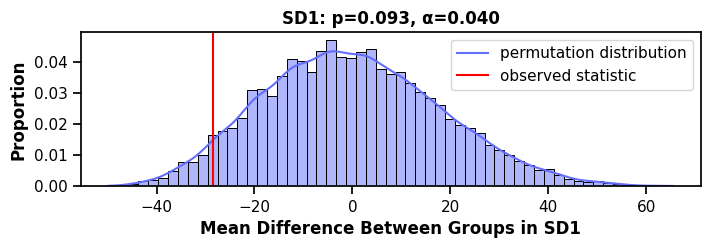

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
RMSSD           -40.27   0.0926        False    15        0.0375   

        BH_Significant  
metric                  
RMSSD            False

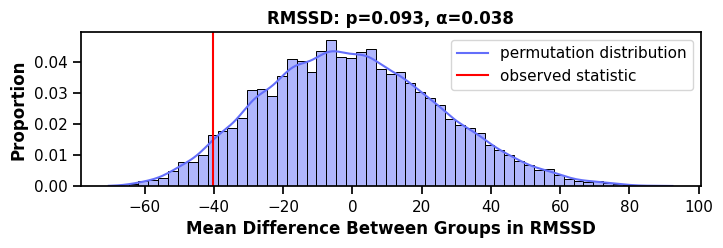

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
S            -15000.94   0.0962        False    14         0.035   

        BH_Significant  
metric                  
S                False

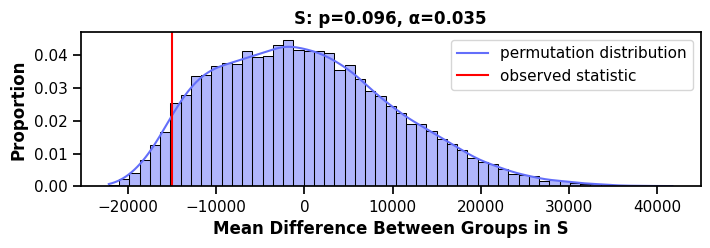

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
DFA α2            0.14     0.11        False    13        0.0325   

        BH_Significant  
metric                  
DFA α2           False

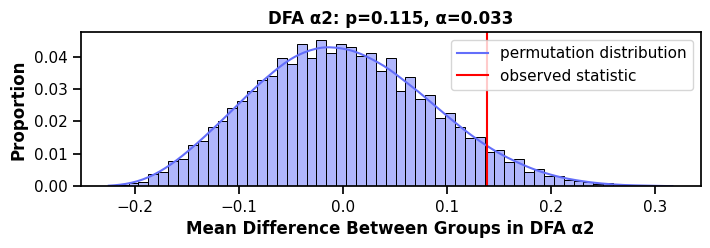

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                    
Mean HR (bpm)            4.97     0.18        False    12          0.03   

               BH_Significant  
metric                         
Mean HR (bpm)           False

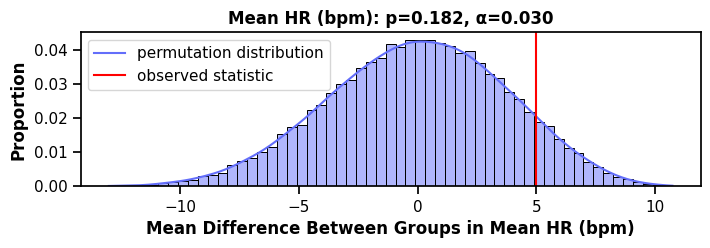

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                
pNN50 (%)           -6.87     0.24        False    11        0.0275   

           BH_Significant  
metric                     
pNN50 (%)           False

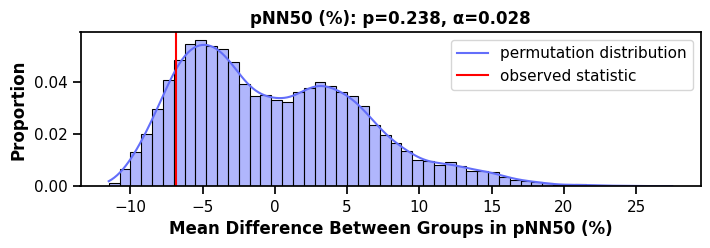

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
D2               -0.67     0.25        False    10         0.025   

        BH_Significant  
metric                  
D2               False

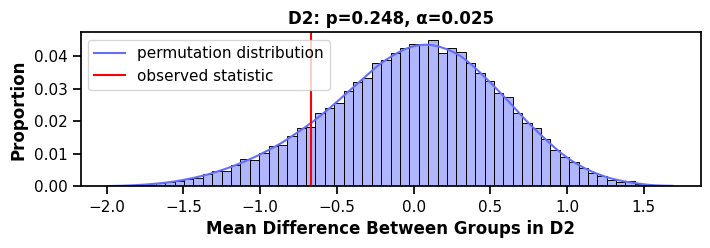

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                        
LF Peak Frequency         -0.0123     0.26        False     9        0.0225   

                   BH_Significant  
metric                             
LF Peak Frequency           False

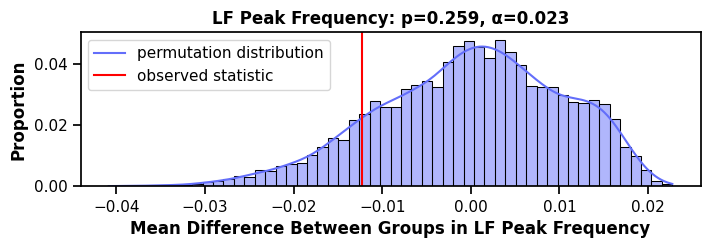

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                         
VLF Peak Frequency        -0.00163     0.29        False     8          0.02   

                    BH_Significant  
metric                              
VLF Peak Frequency           False

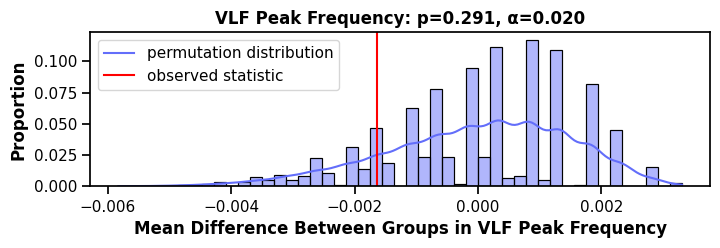

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                              
SD1÷SD2         -0.0908     0.31        False     7        0.0175   

         BH_Significant  
metric                   
SD1÷SD2           False

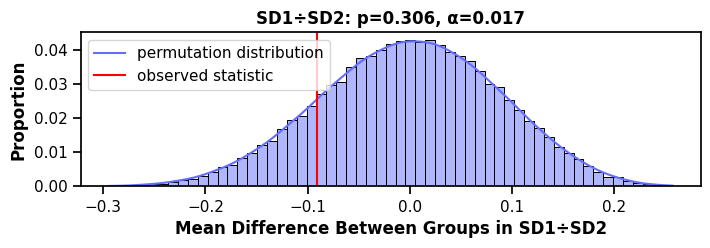

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                        
HF Peak Frequency          0.0152     0.33        False     6         0.015   

                   BH_Significant  
metric                             
HF Peak Frequency           False

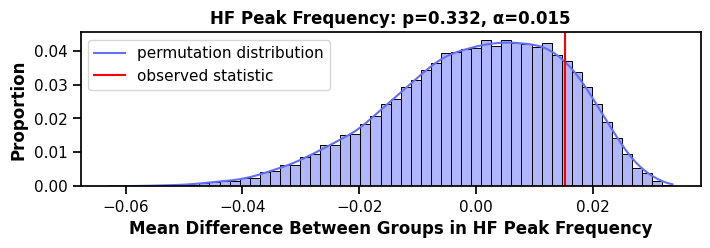

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
ApEn           -0.0763     0.44        False     5        0.0125   

        BH_Significant  
metric                  
ApEn             False

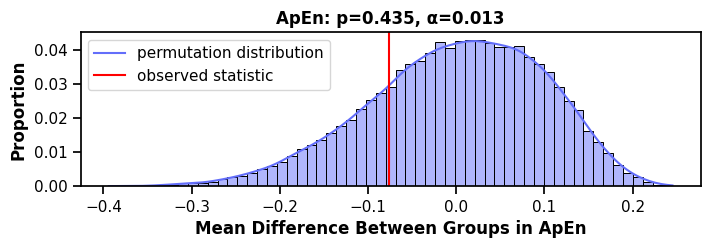

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
SampEn         -0.0858     0.47        False     4          0.01   

        BH_Significant  
metric                  
SampEn           False

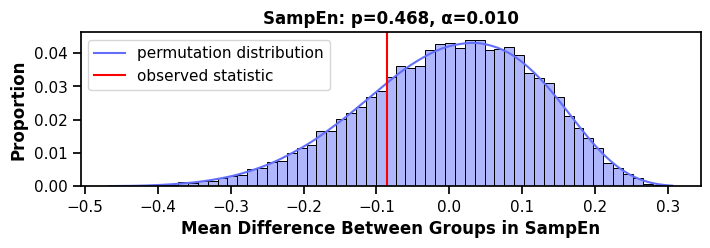

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                             
DFA α1           0.024     0.73        False     3        0.0075   

        BH_Significant  
metric                  
DFA α1           False

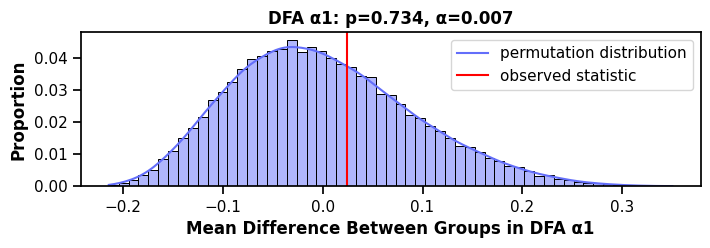

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                  
LF÷HF Ratio         -0.0151     0.86        False     2         0.005   

             BH_Significant  
metric                       
LF÷HF Ratio           False

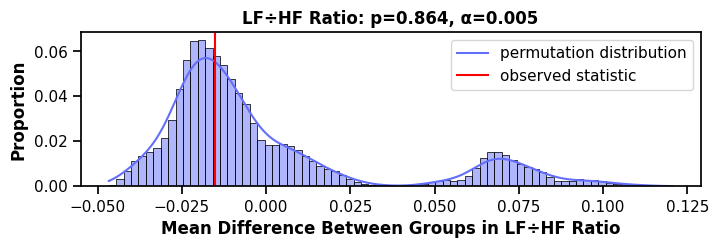

perm_statistic  p_value  significant  rank  BH_threshold  \
metric                                                                
VLF Power       -6.24e-07     0.92        False     1        0.0025   

           BH_Significant  
metric                     
VLF Power           False

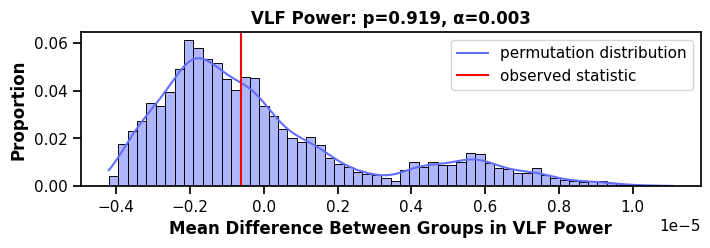

In [100]:
result.tail(3)
for metric in result.index:
    display(to_print[to_print.index == metric])
    plt.figure(figsize=(8, 2))
    sns.histplot(data=result.loc[metric, "distribution"], stat="proportion", kde=True)
    #title = f"permutation test dist. of {metric} 
    plt.title(f"{metric}: p={result.loc[metric, 'p_value']:.3f}, α={result.loc[metric, 'BH_threshold']:.3f}")
    plt.axvline(result.loc[metric, "perm_statistic"], color='red')
    plt.legend(["permutation distribution", "observed statistic"])
    plt.xlabel(f"Mean Difference Between Groups in {metric}")
    plt.show()

In [101]:
#plot_normalized(normalize_melt(median_melted), "Normalized Median Distribution")

## Odds ratio

In [102]:
median = data.groupby(['id', 'DPN'])[indicator_columns].median()
median = median.reset_index()
median.tail(2)

id   DPN  SDRR  RMSSD  pNN50 (%)  Mean HR (bpm)  VLF Power  \
24  39  True 30.47  19.27       0.56          83.54    4.8e-06   
25  40  True 82.12  48.14      11.37          78.18   2.85e-06   

    VLF Peak Frequency  LF Power  LF Peak Frequency  ...  LF÷HF Ratio    S  \
24                0.03  2.22e-05             0.0775  ...       0.0792 1659   
25                0.03  2.92e-05               0.12  ...       0.0723 9363   

     SD1    SD2  SD1÷SD2  ApEn  SampEn  DFA α1  DFA α2    D2  
24 13.62  39.06     0.37  0.65    0.59    0.95    1.08 -3.26  
25 34.04 105.21     0.43  0.95    0.90    0.87    0.96 -2.75  

[2 rows x 22 columns]

In [103]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### KDE derrival
Weight the KDE by number of units

In [104]:
def compute_kde_for_metric(data, metric, weight_data = False):
    # Separate the data based on the 'DPN' column
    control_data = data[data['DPN'] == False][metric]
    dpn_data = data[data['DPN'] == True][metric]

    # Compute the kernel density estimate for each group
    control_kde = stats.gaussian_kde(control_data) 
    dpn_kde = stats.gaussian_kde(dpn_data)  

    x_values = np.linspace(min(data[metric]), max(data[metric]), 100)

    kde_df = pd.DataFrame({
        'x_values': x_values,
        'control_kde': control_kde(x_values),
        'dpn_kde': dpn_kde(x_values),
    })
    if weight_data:
        kde_df["control_kde"] = kde_df["control_kde"] * sum(data['DPN'] == False)/len(data['DPN'])
        kde_df["dpn_kde"] = kde_df["dpn_kde"] * sum(data['DPN'] == True)/len(data['DPN'])

    kde_df["dpn_chance"] = kde_df["dpn_kde"] / (kde_df["dpn_kde"] + kde_df["control_kde"])

    return kde_df

# Example usage
metric = 'SDRR'
kde_df = compute_kde_for_metric(median, metric)
display(kde_df)

x_values  control_kde  dpn_kde  dpn_chance
0      22.31      0.00224  0.00825        0.79
1      23.60      0.00246  0.00836        0.77
2      24.89      0.00268  0.00846        0.76
3      26.18      0.00292  0.00854        0.75
4      27.47      0.00316   0.0086        0.73
..       ...          ...      ...         ...
95    144.92      0.00423 0.000346      0.0756
96    146.21      0.00407 0.000303      0.0693
97    147.50      0.00391 0.000265      0.0635
98    148.79      0.00374 0.000231      0.0582
99    150.08      0.00357 0.000201      0.0532

[100 rows x 4 columns]

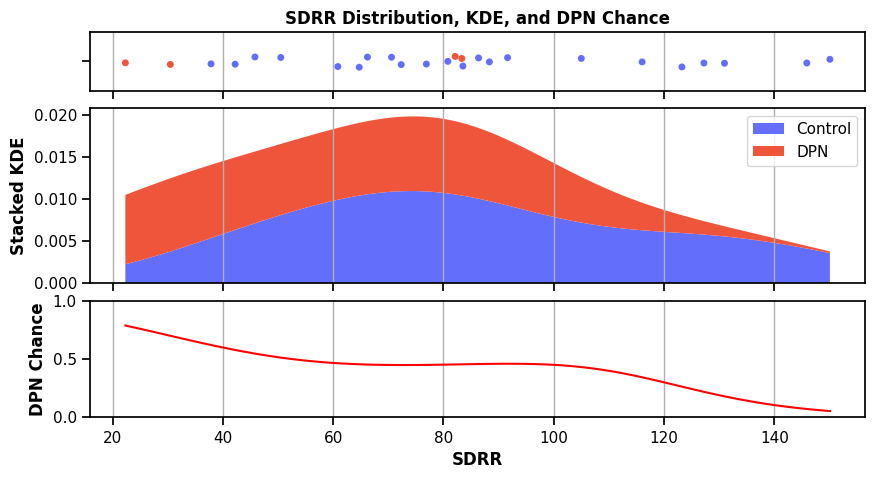

In [105]:
def plot_metric_distribution(metric, kde_df):
   # kde_df = compute_kde_for_metric(median, metric)
    fig, axs = plt.subplots(3, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [1, 3, 2], 'hspace': 0.15})
    
    # Upper subplot
    sns.stripplot(data=median, x=metric, hue='DPN', alpha=1, ax=axs[0])
    axs[0].set_title(f'{metric} Distribution, KDE, and DPN Chance')
    axs[0].grid(True, axis='x')
    axs[0].legend().set_visible(False)

    # Middle subplot
    axs[1].stackplot(kde_df['x_values'], kde_df['control_kde'], kde_df['dpn_kde'], labels=['Control', 'DPN'])
    axs[1].legend()
    axs[1].set_ylabel('Stacked KDE')

    # Lower subplot
    sns.lineplot(data=kde_df, x='x_values', y='dpn_chance', color='red', ax=axs[2])
    axs[2].set_xlabel(metric)
    axs[2].set_ylabel('DPN Chance')
    axs[2].set_ylim(0, 1)

    # Remove x labels for the upper and middle plots
    for ax in axs[:2]:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    for ax in axs:
        ax.grid(True, axis='x')

    #plt.tight_layout()
    plt.show()

kde_df = compute_kde_for_metric(median, 'SDRR')
plot_metric_distribution('SDRR', kde_df)

### Drawing all KDEs

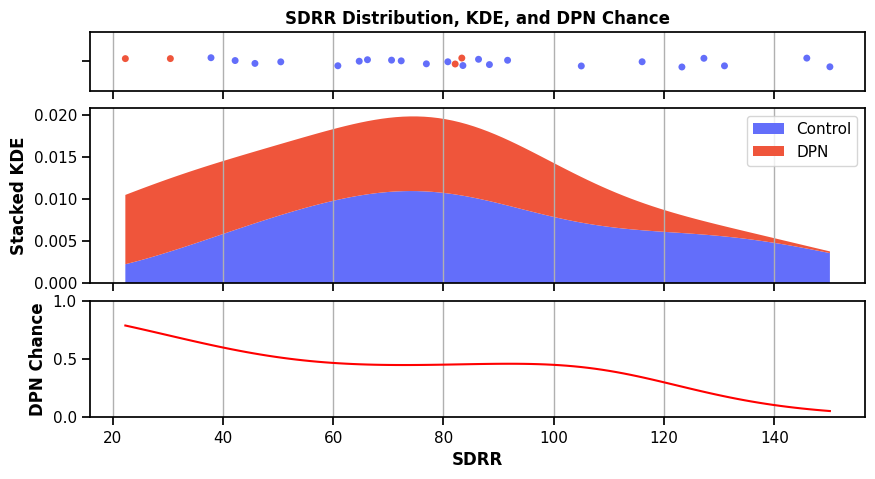

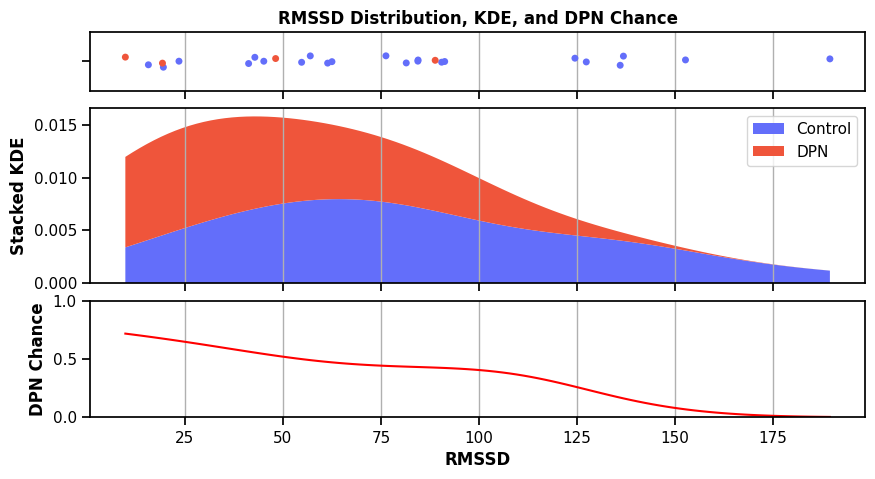

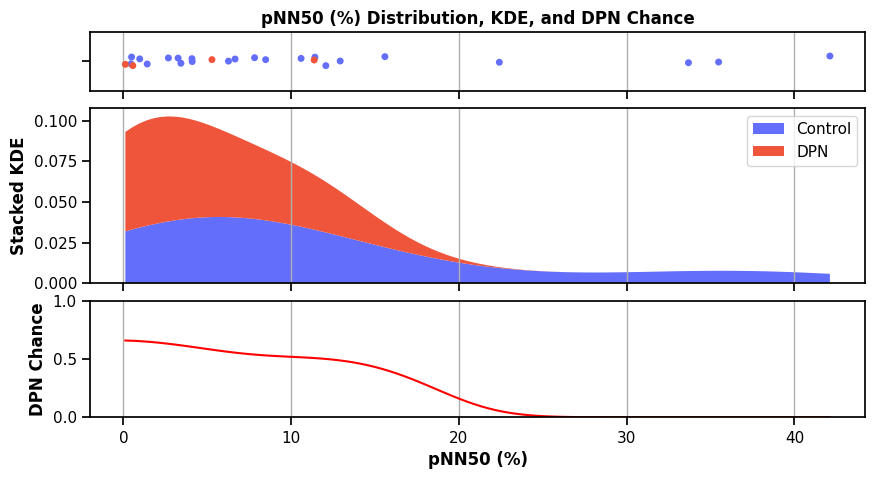

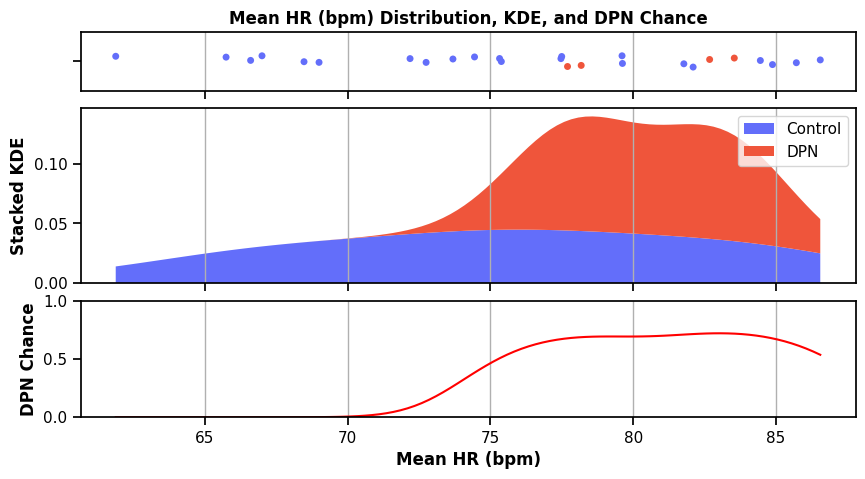

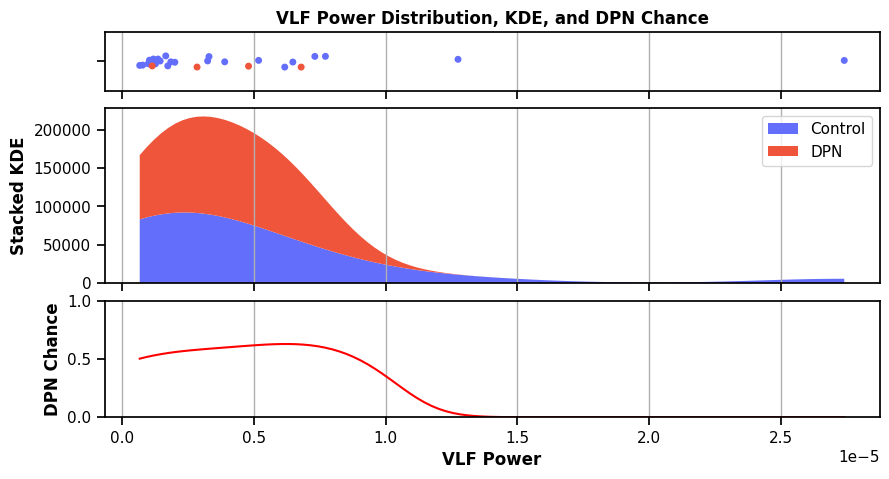

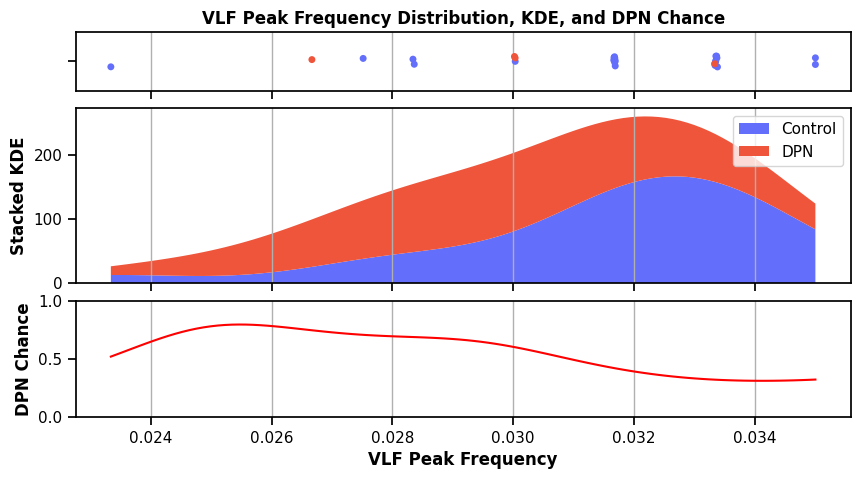

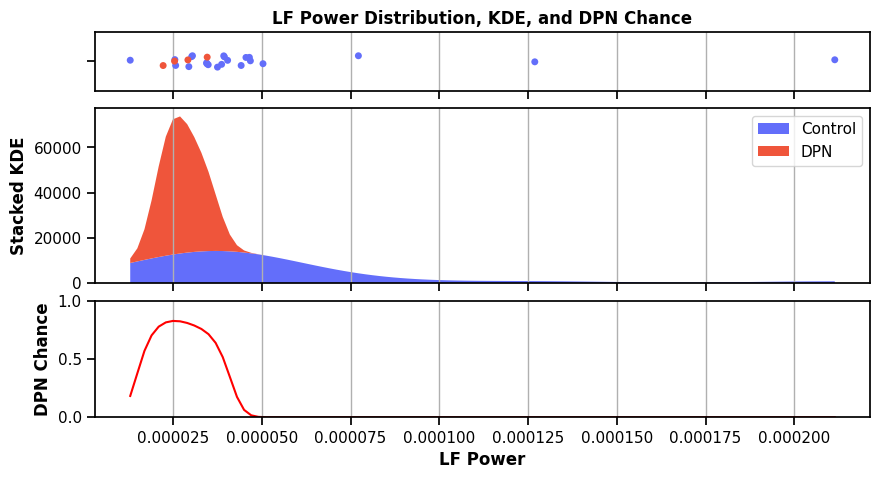

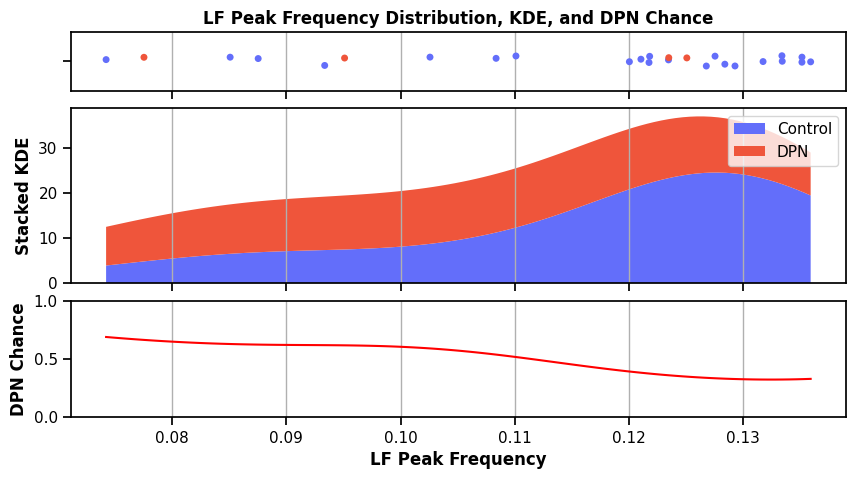

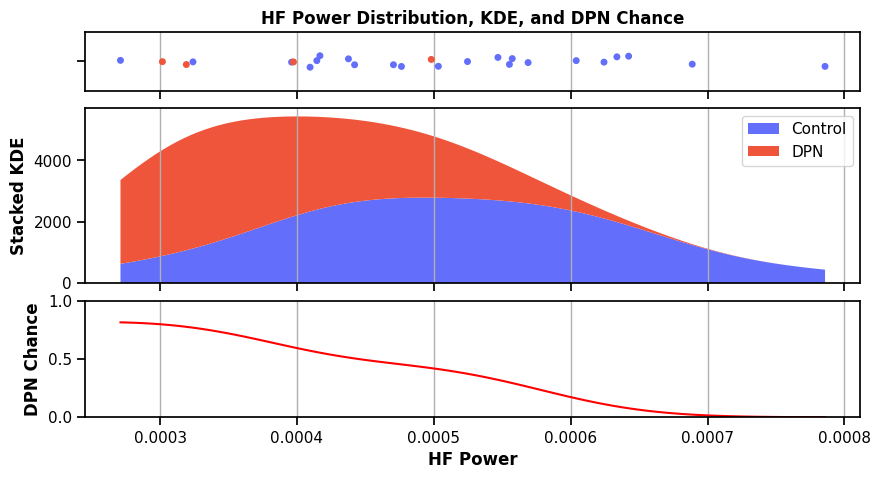

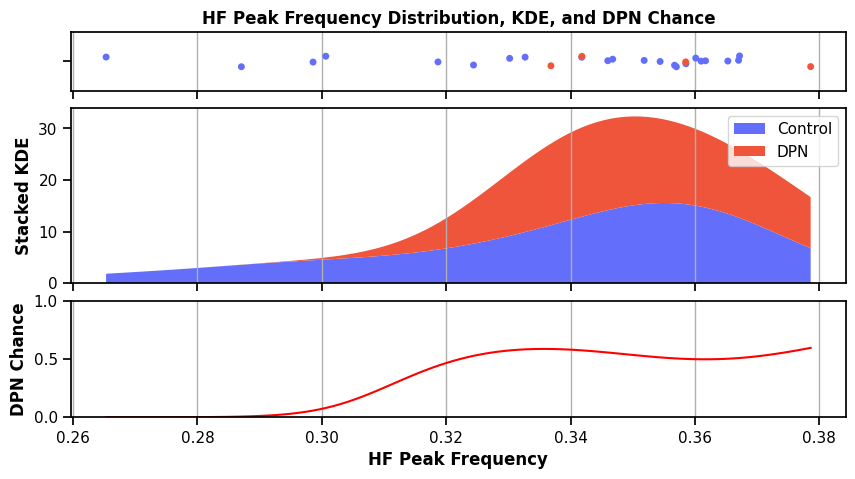

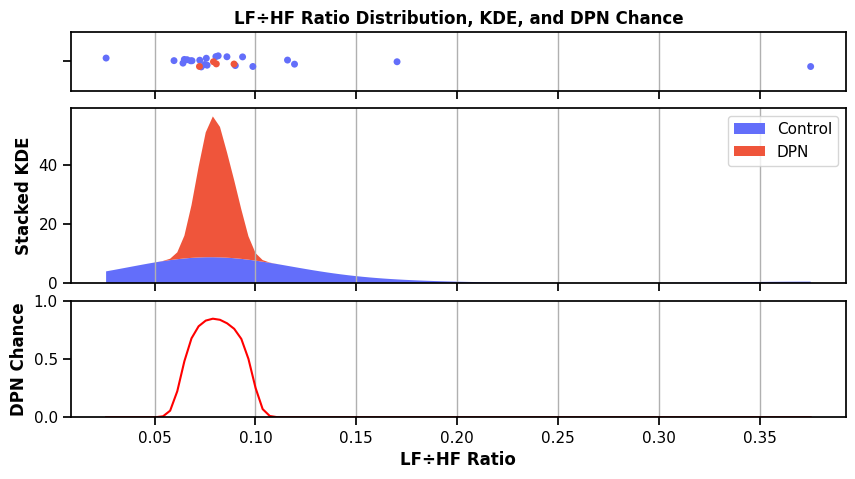

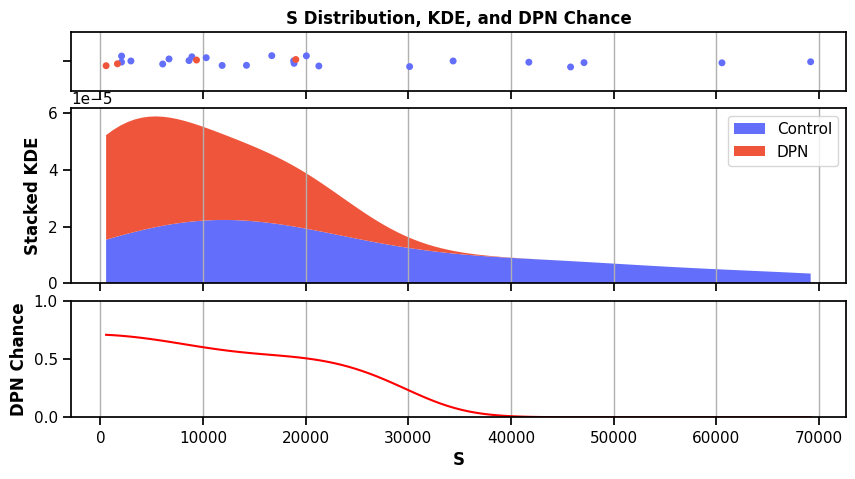

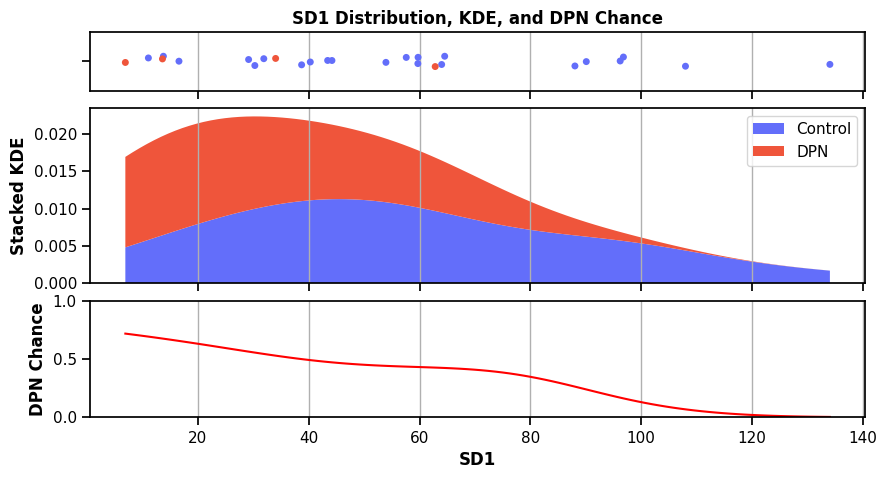

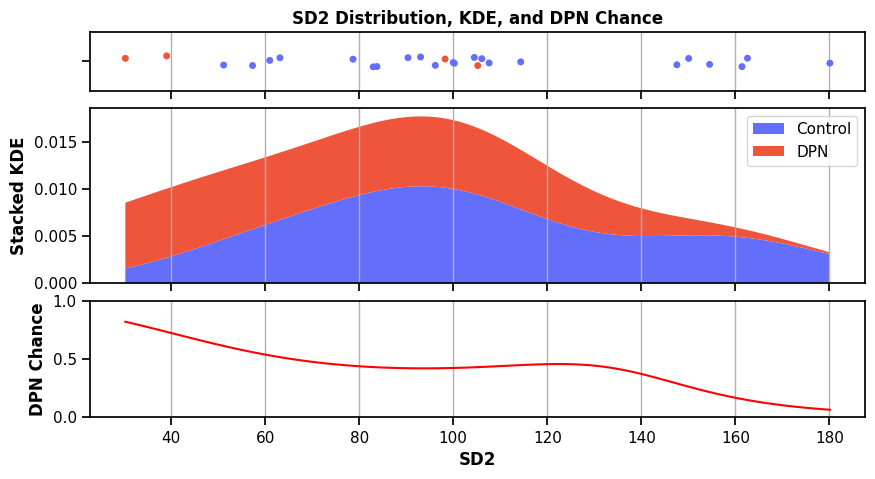

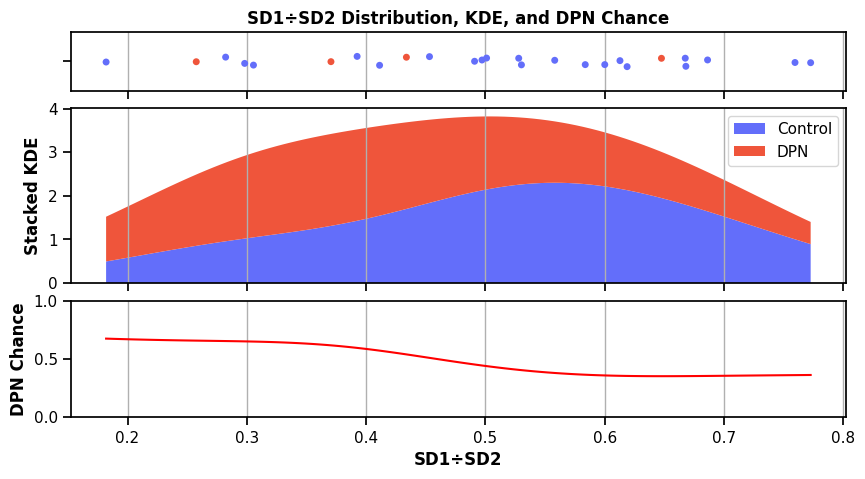

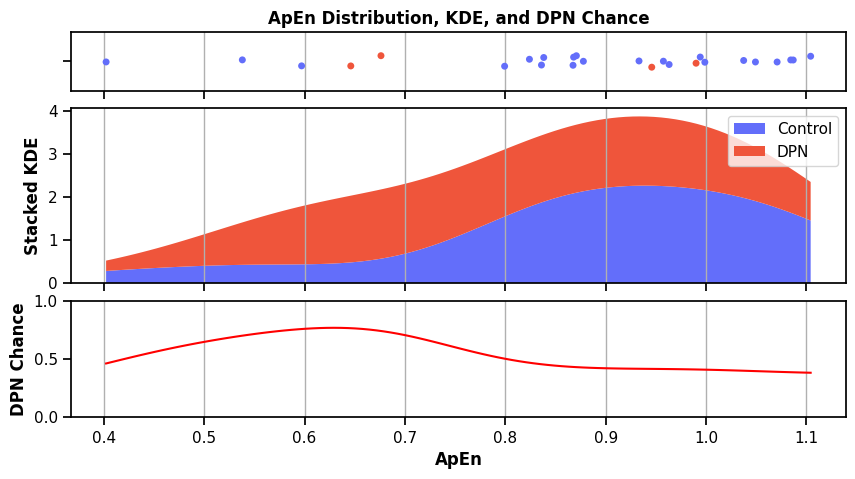

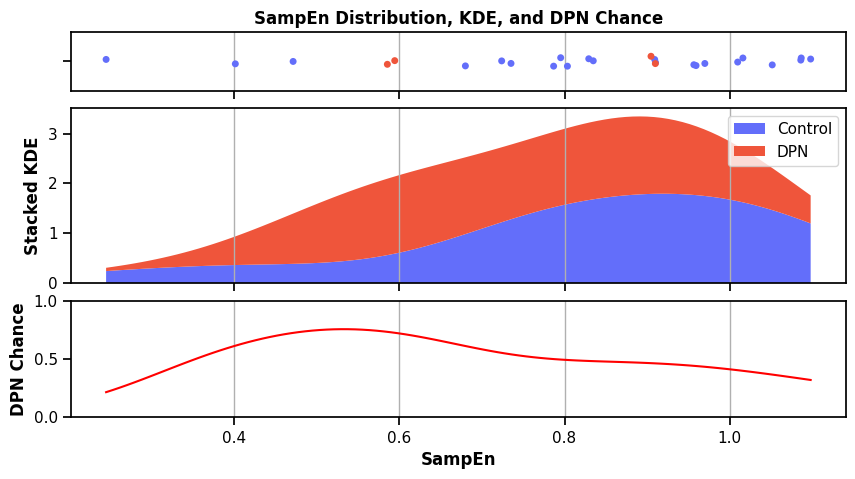

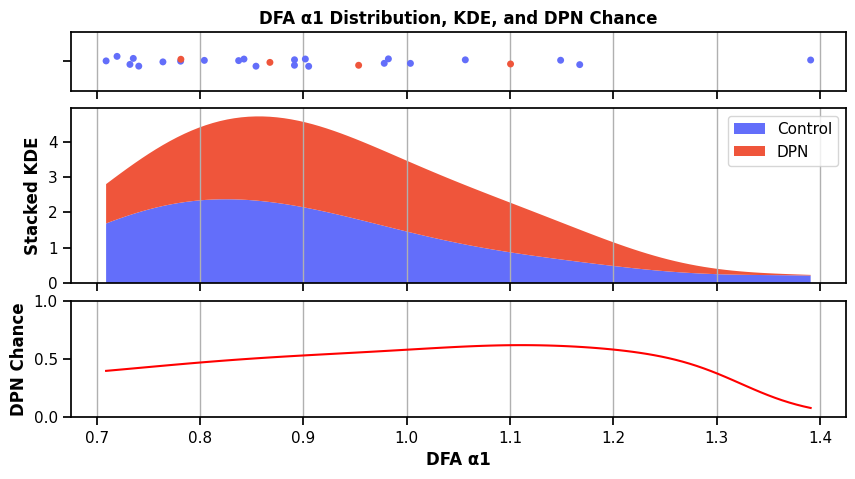

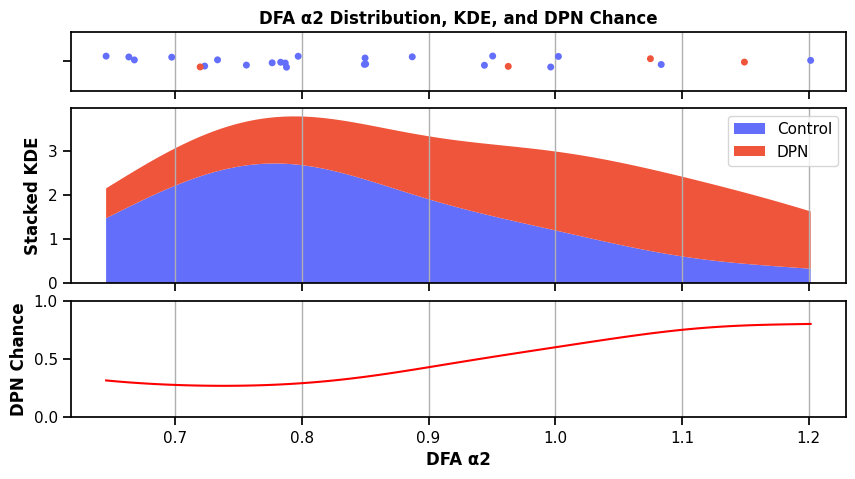

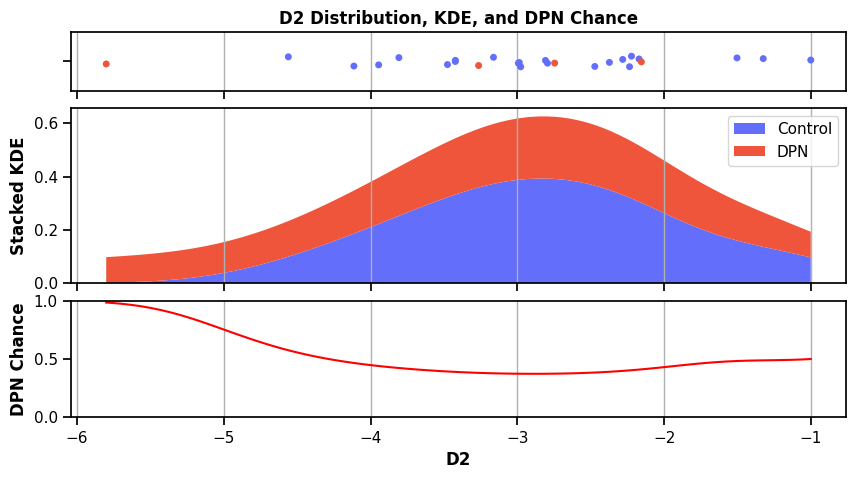

In [106]:
kde_dict = {metric: compute_kde_for_metric(median, metric, False) for metric in indicator_columns}

for metric, kde_df in kde_dict.items():
    
    plot_metric_distribution(metric, kde_df)
    #break;

# DPN illustrations

In [107]:
data.columns
data.id

1        3
2        3
3        3
4        3
5        3
        ..
3245    40
3249    40
3251    40
3253    40
3254    38
Name: id, Length: 2652, dtype: int64

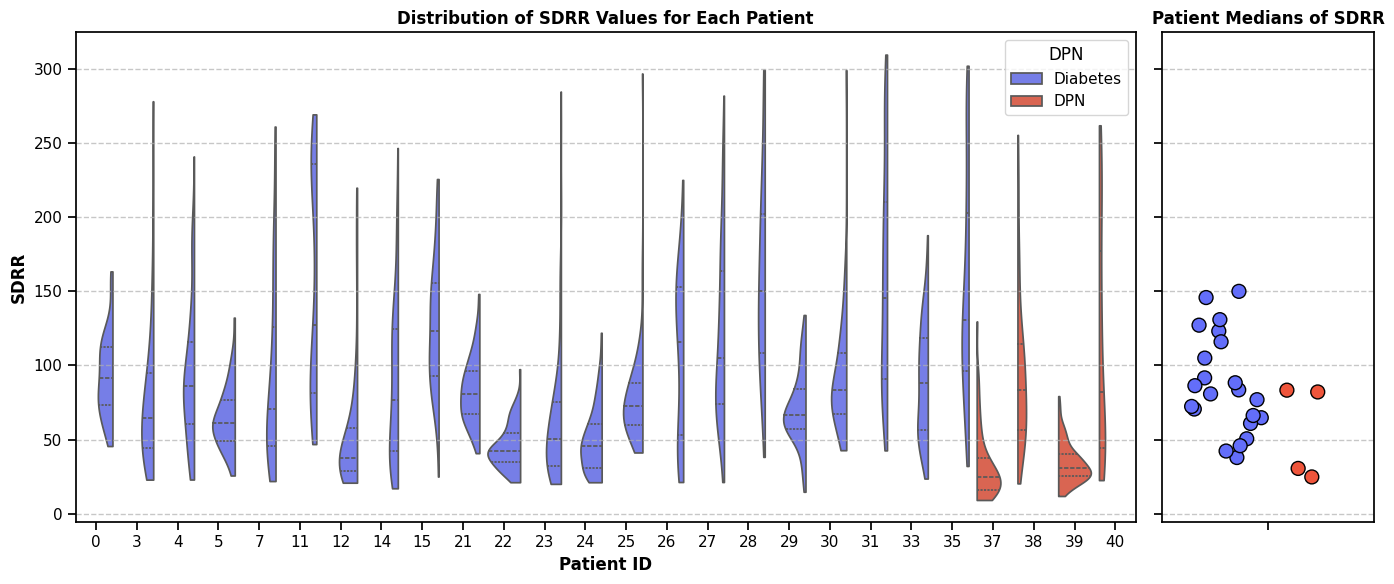

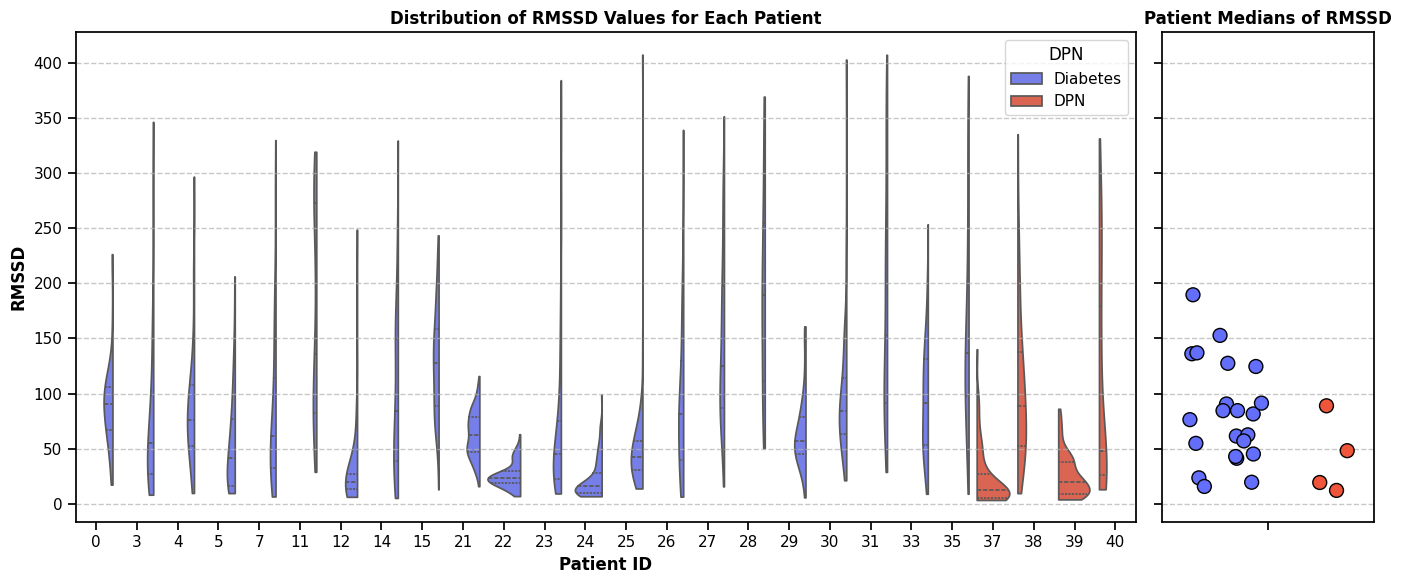

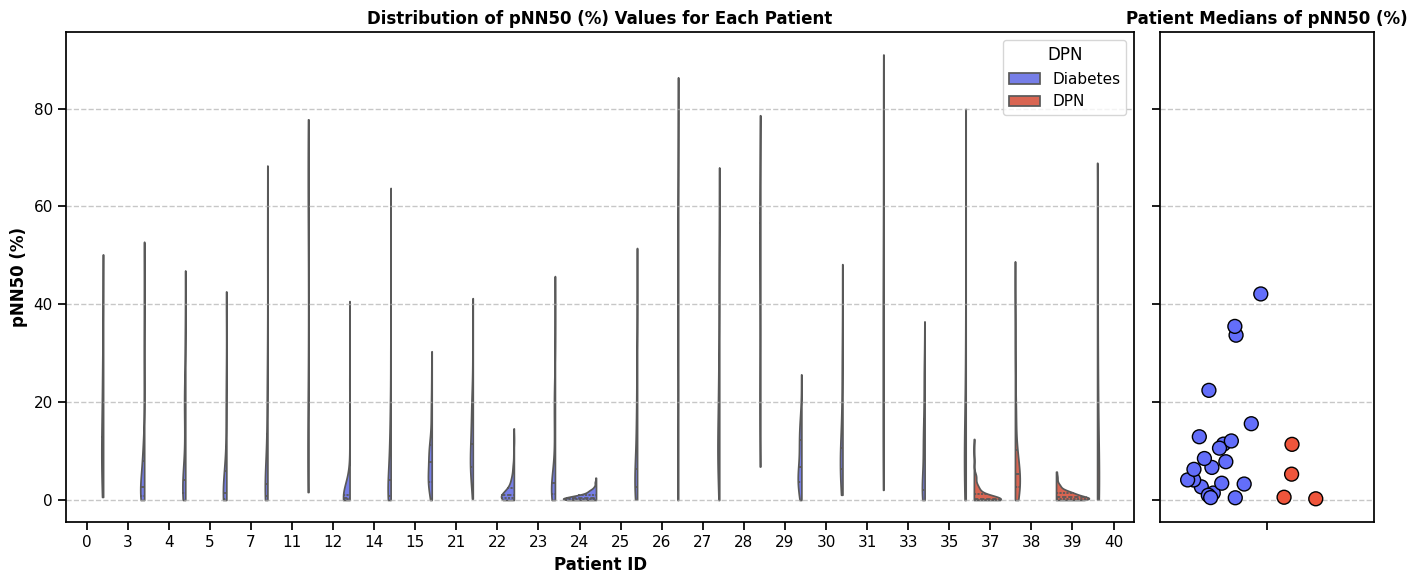

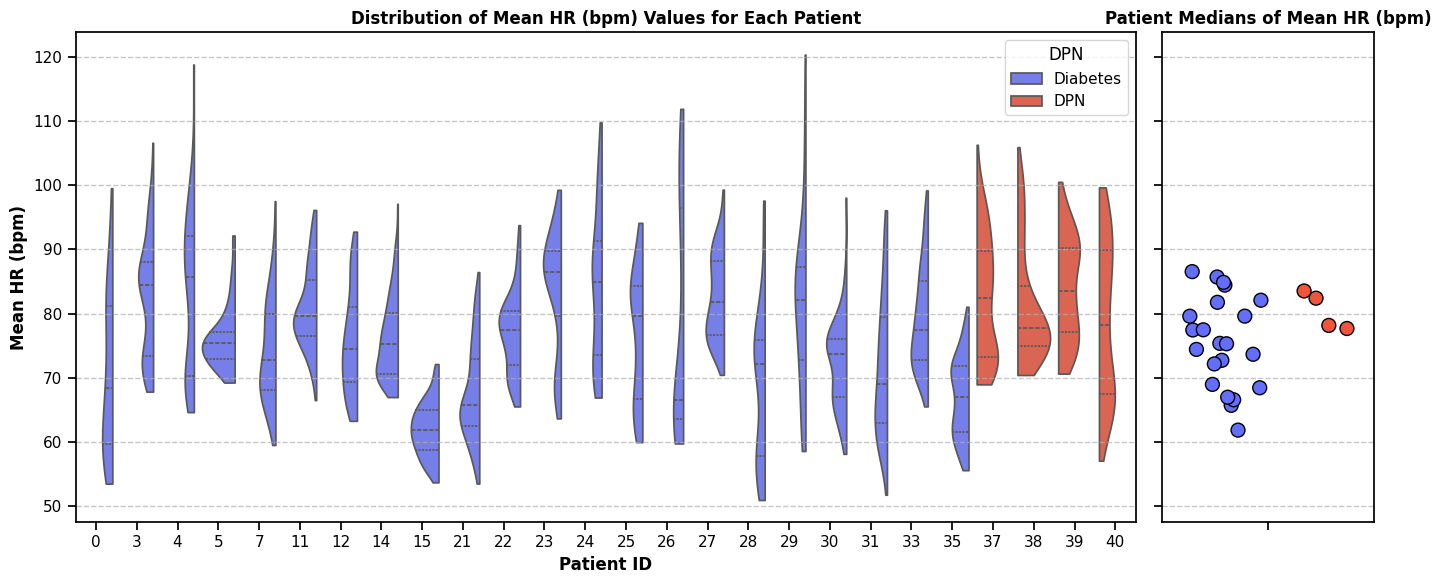

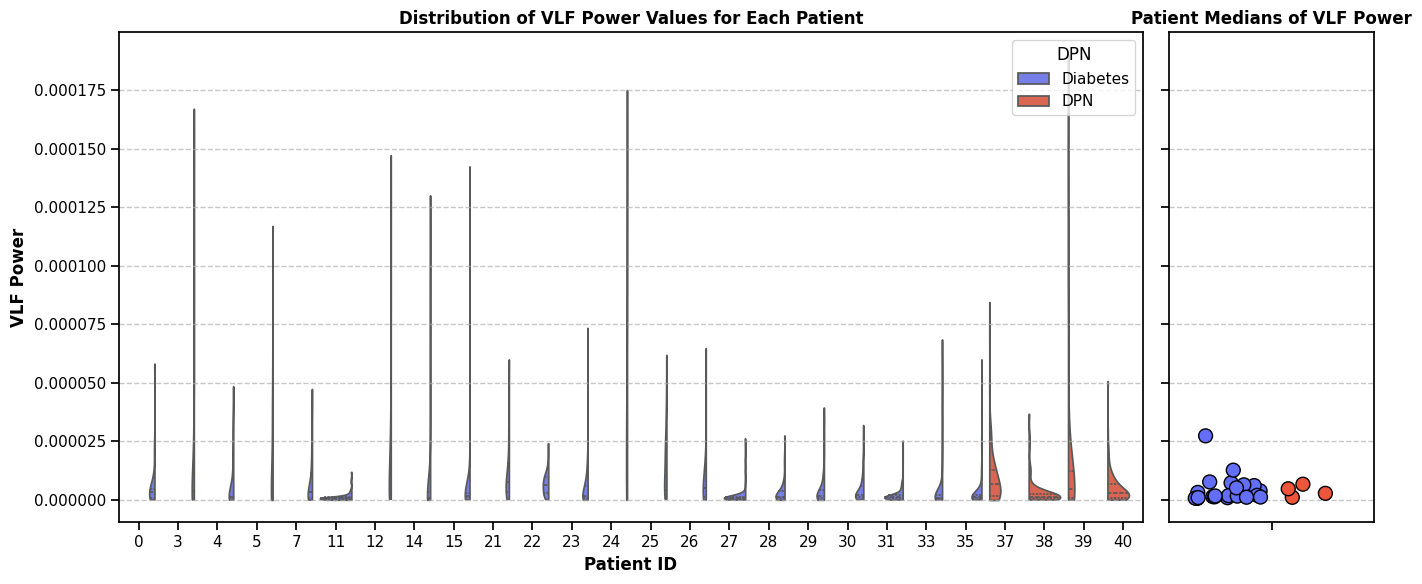

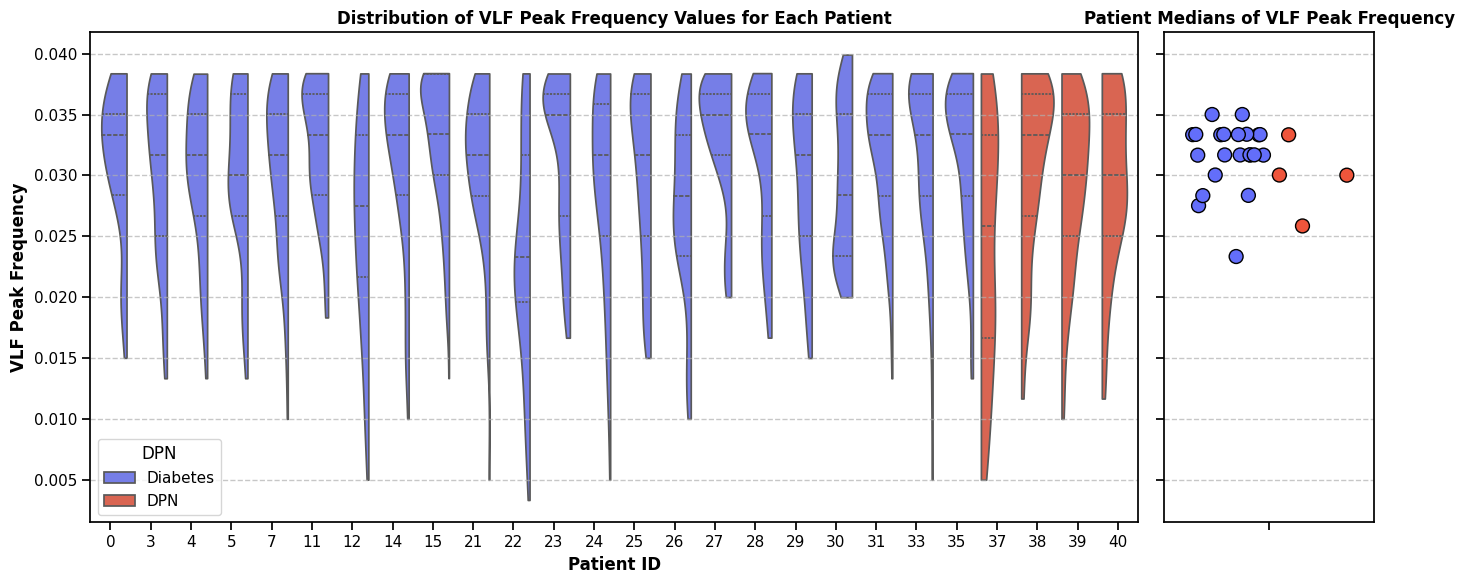

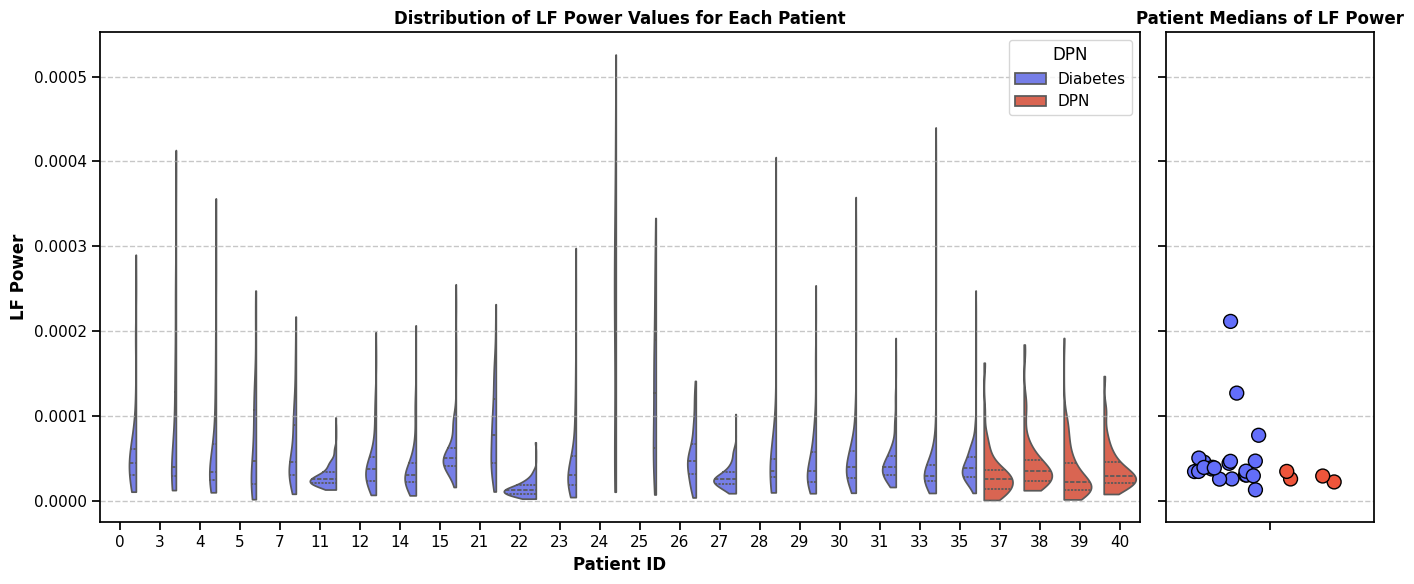

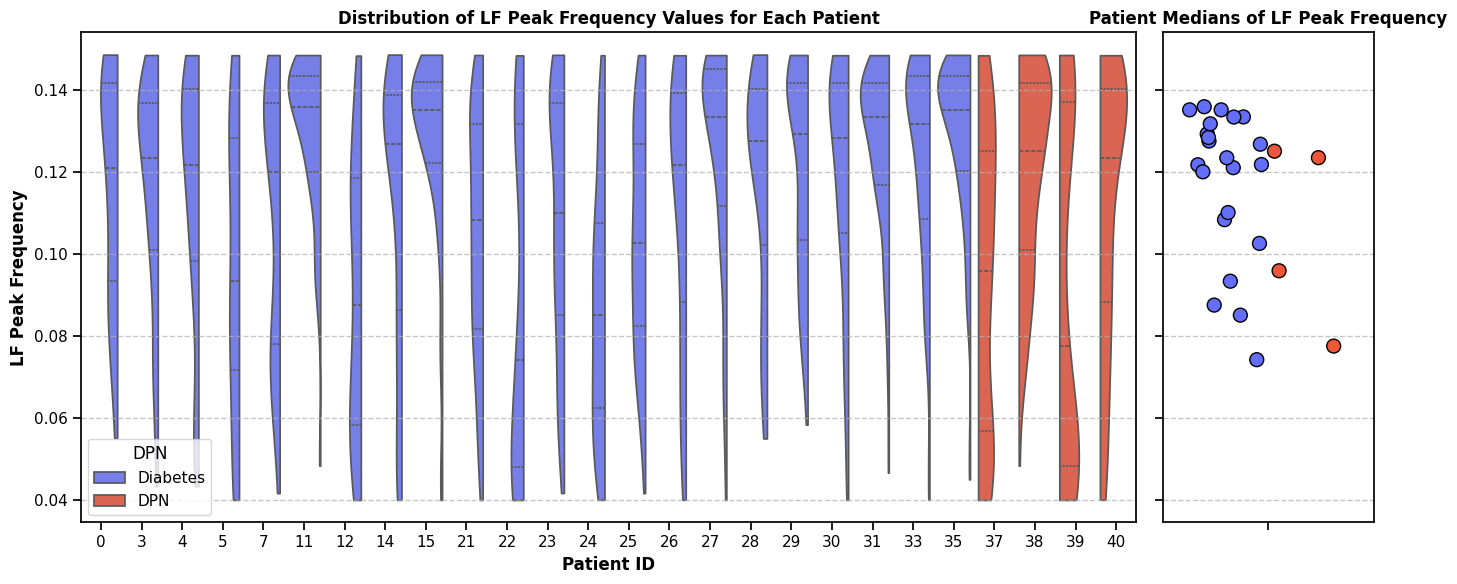

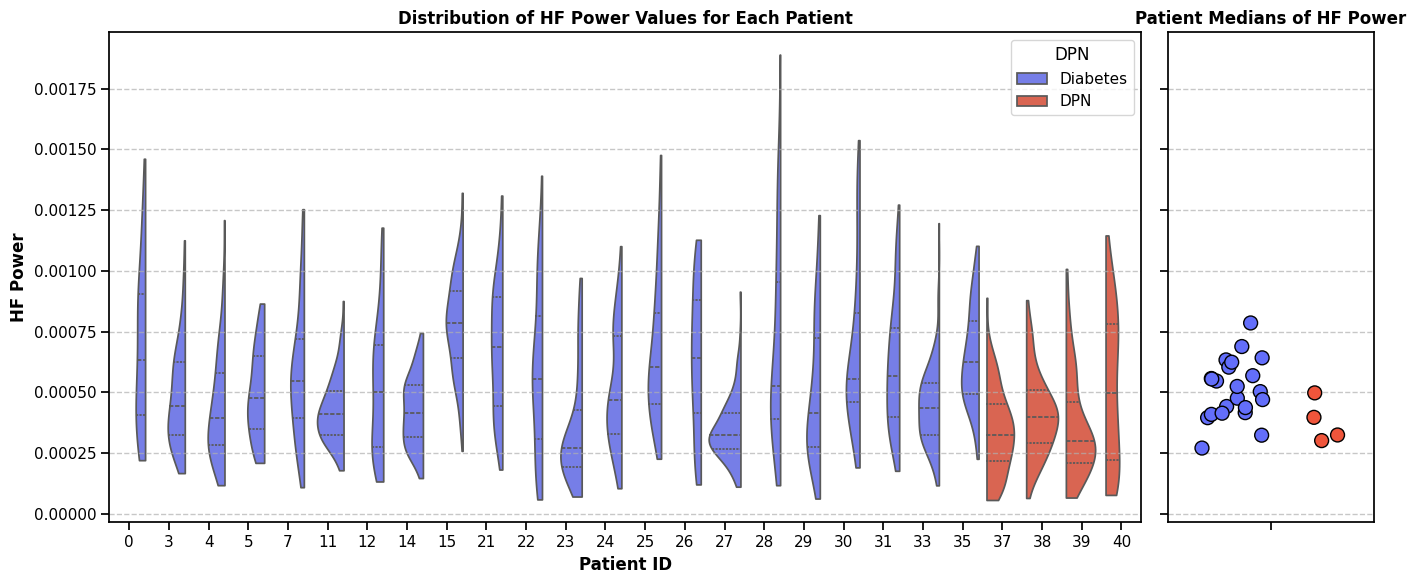

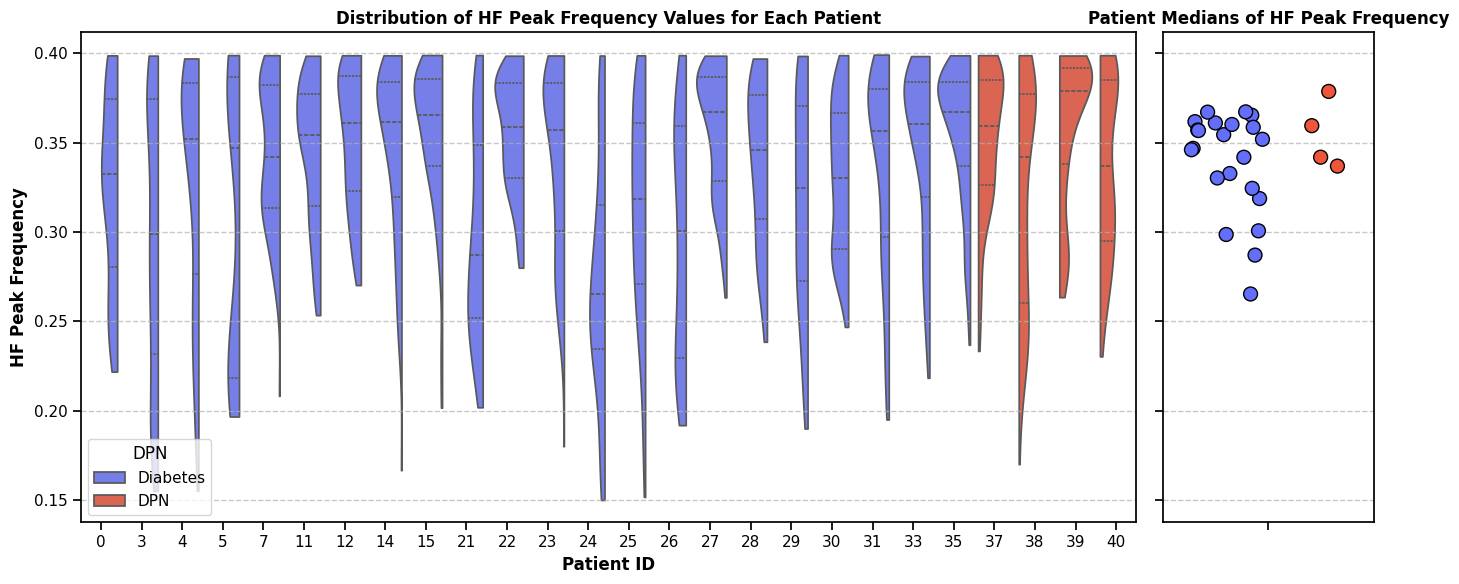

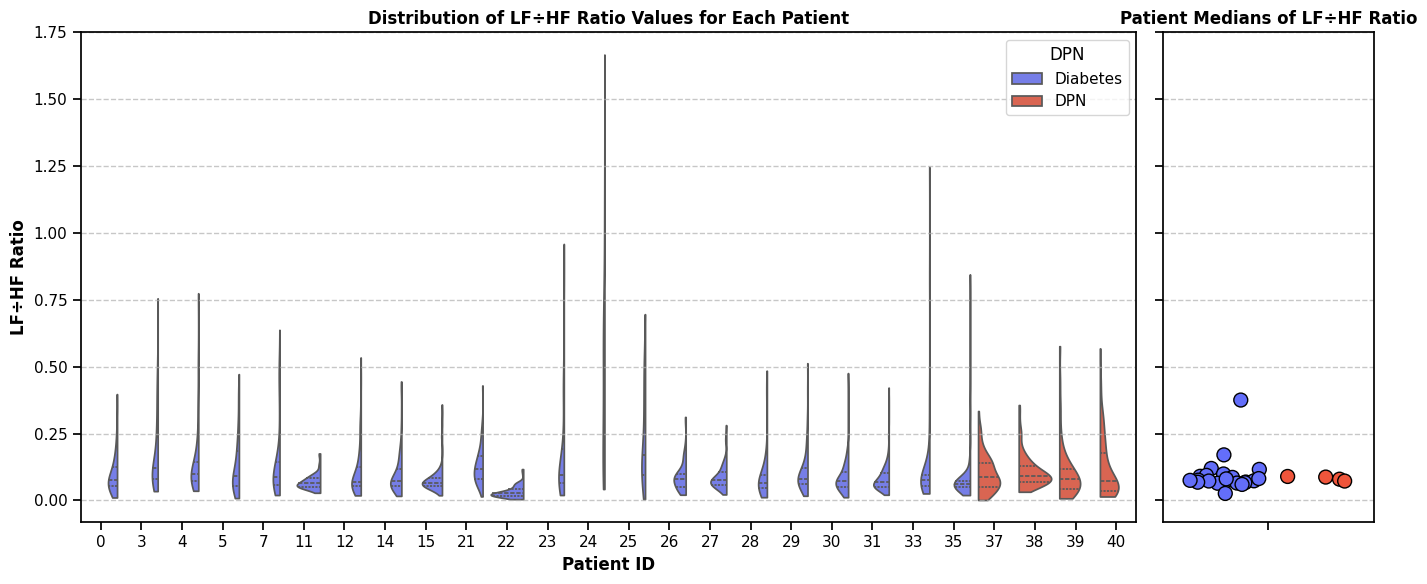

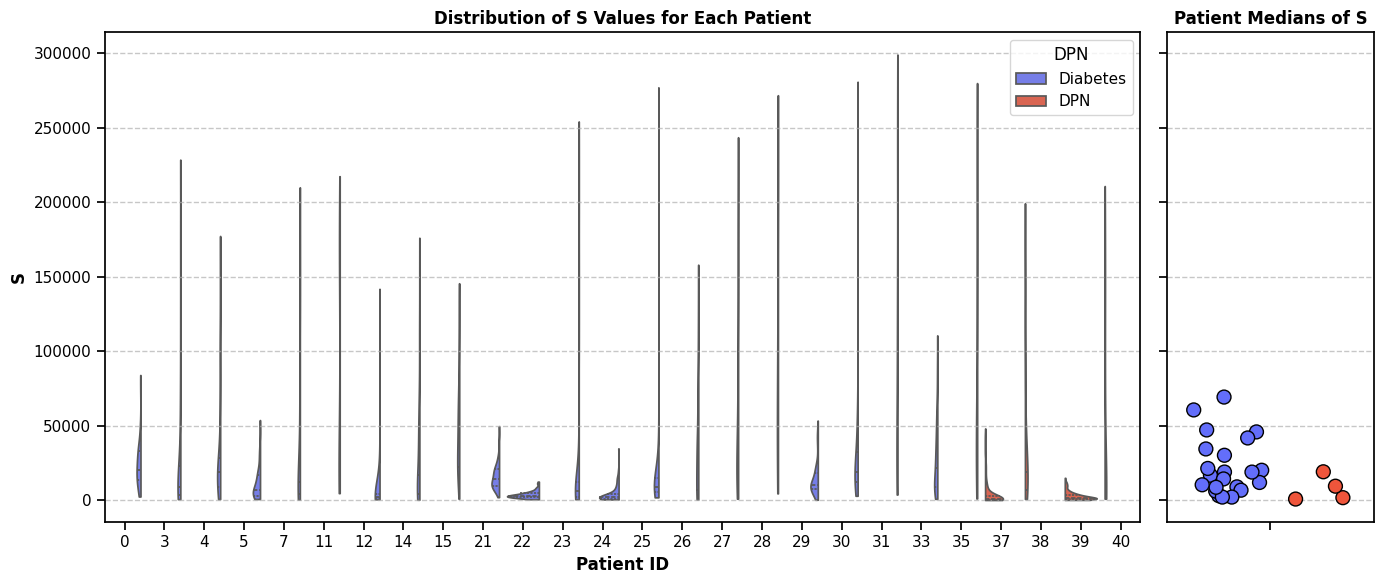

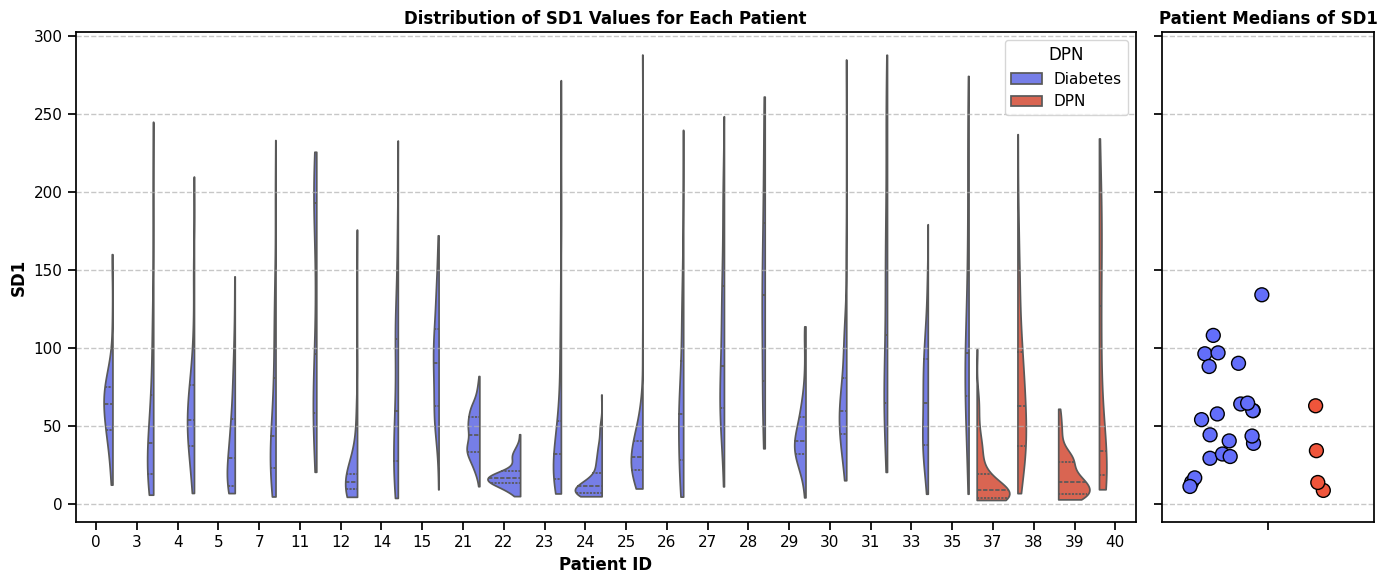

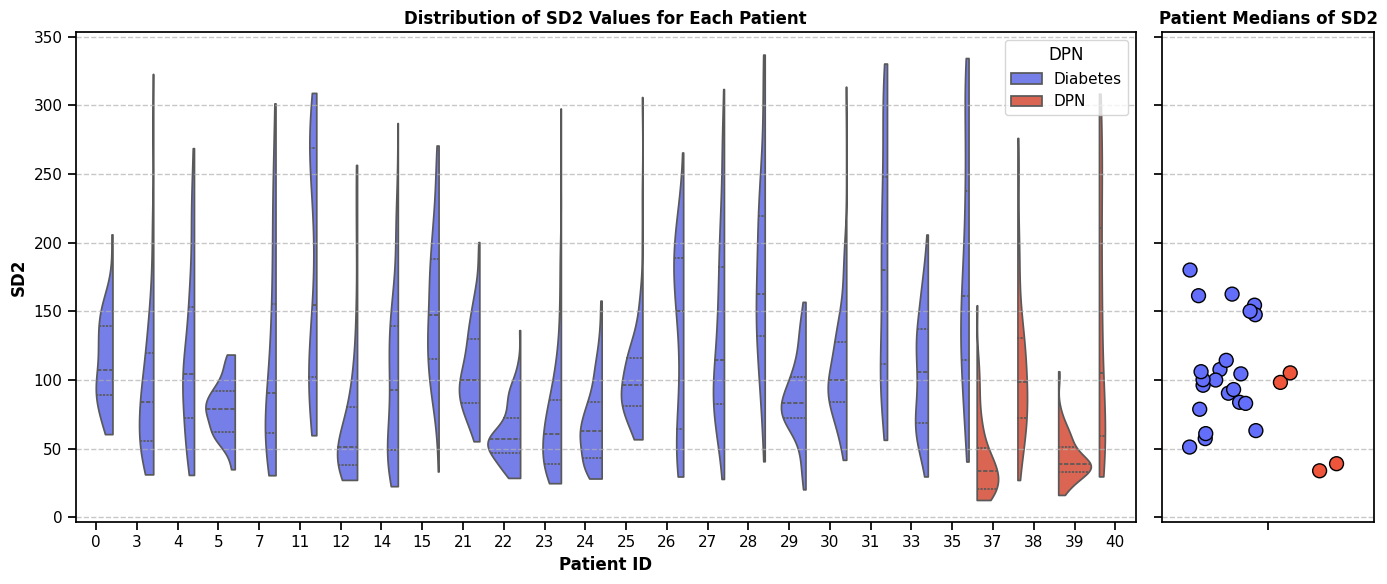

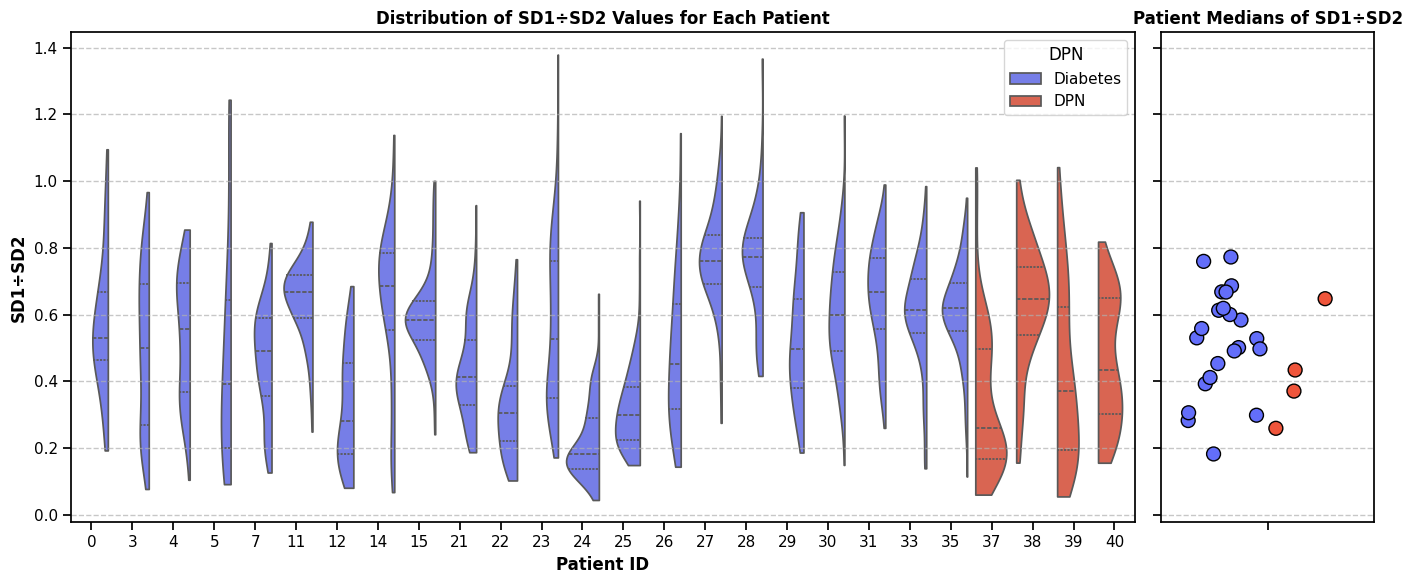

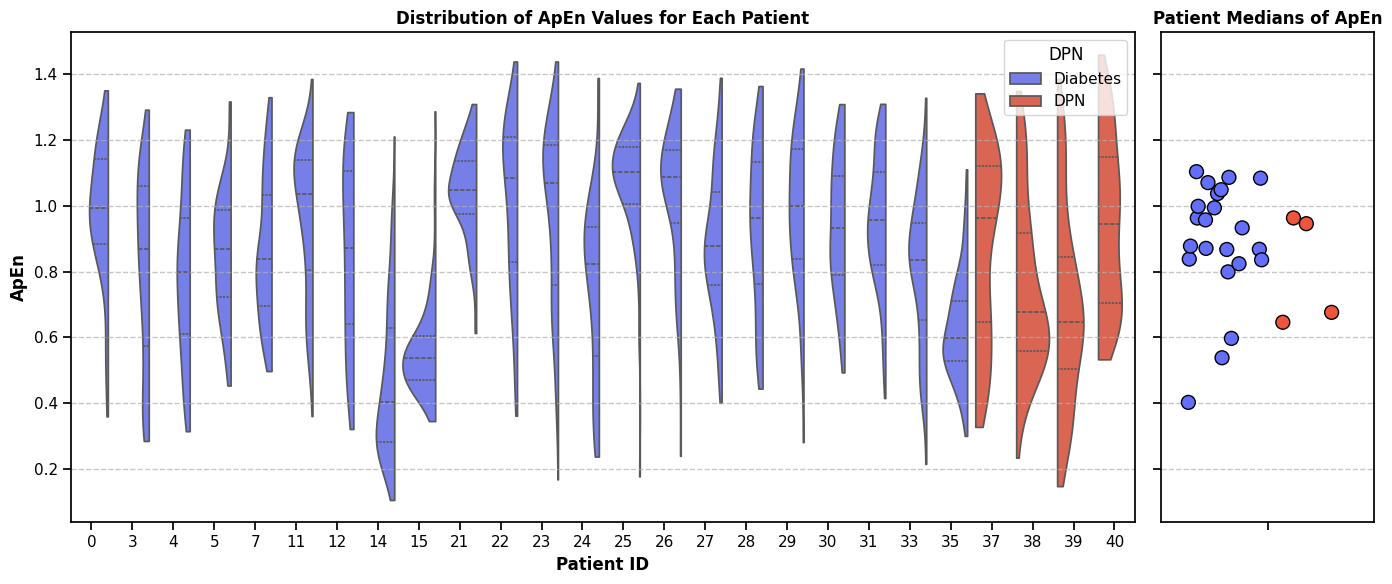

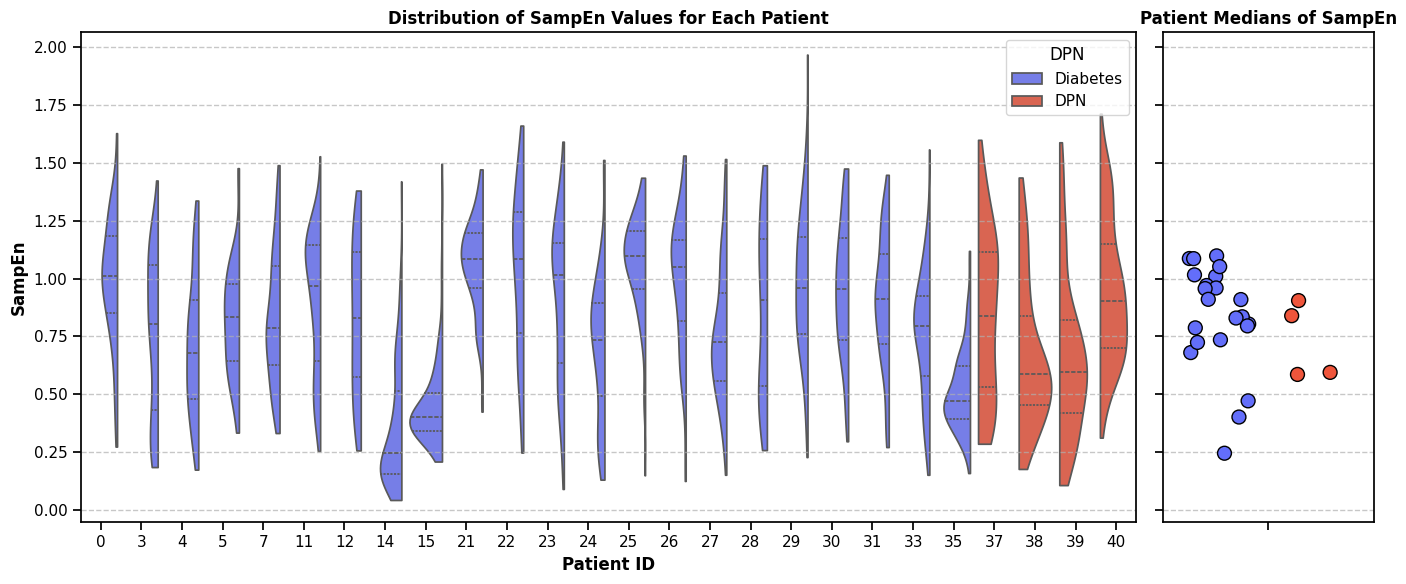

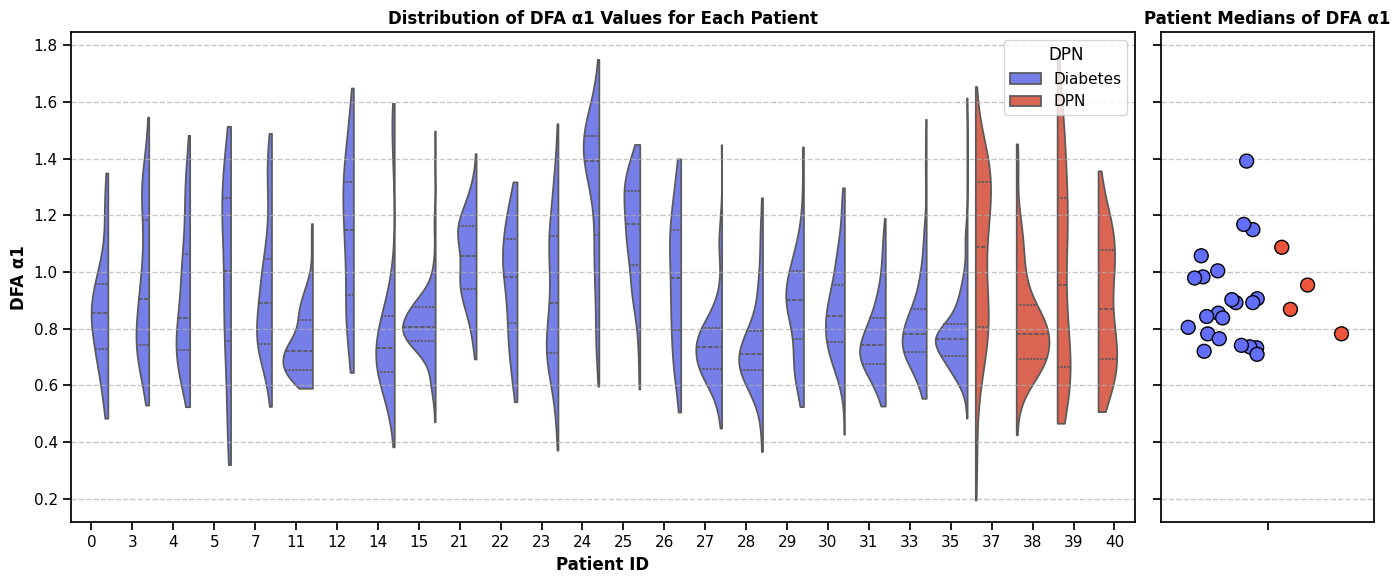

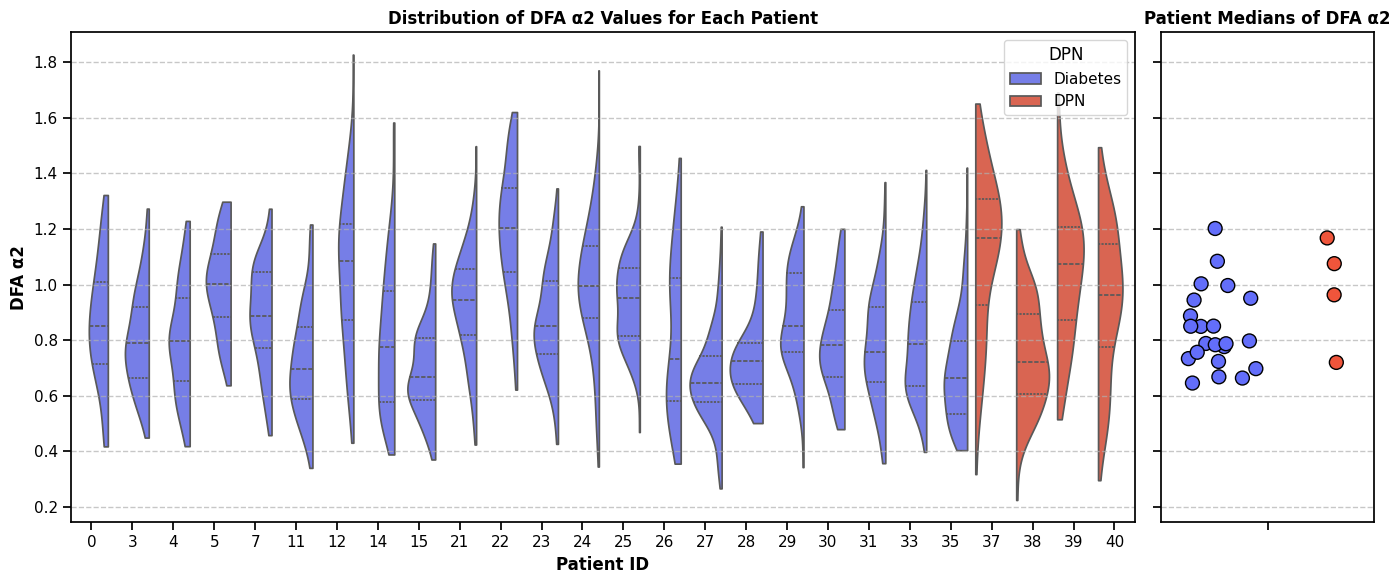

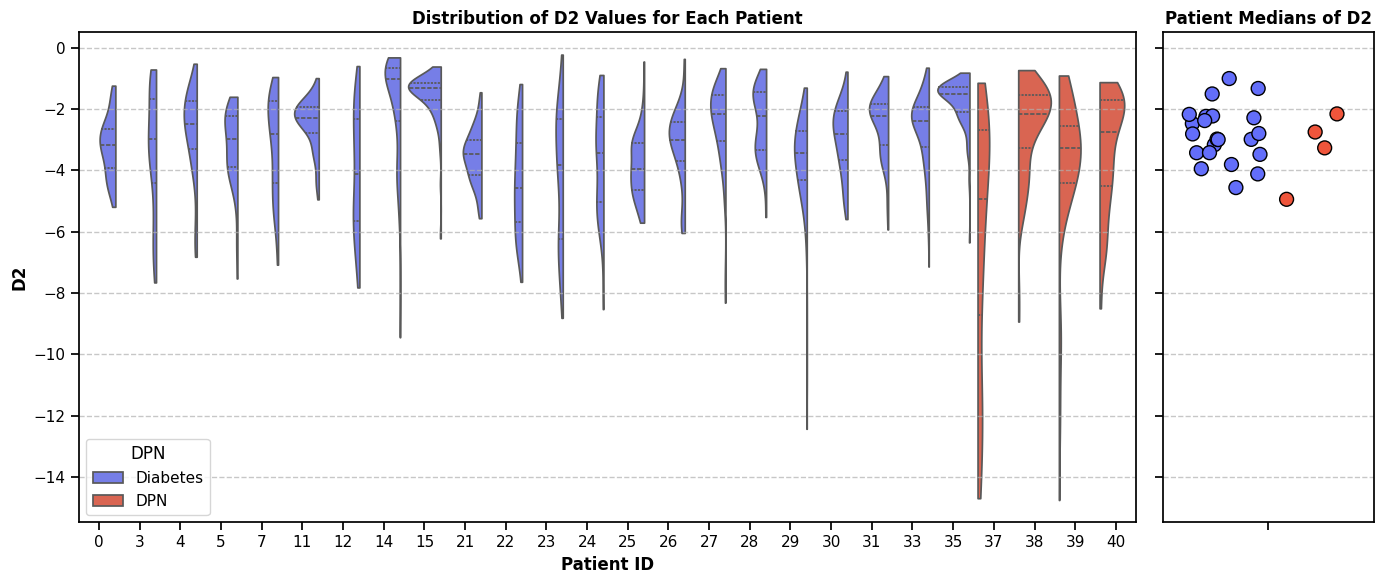

In [ ]:
data = data[abs(data.D2)<16]
data["DPN"].replace({False: "Diabetes", True: "DPN"}, inplace=True)
def plot_metric_distribution(metric, data):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [5, 1]}, sharey=True)

    
    sns.violinplot(
        data=data,
        x="id",
        split=True,
        y=metric,
        hue = "DPN",
        inner='quartile',
        cut=0,
        ax=ax1,
    )
    #ax1.legend(title="Condition", labels=["Control", "DPN"])
    ax1.set_title(f"Distribution of {metric} Values for Each Patient")
    ax1.set_xlabel("Patient ID")
    ax1.set_ylabel(metric)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)



    medians = deciles.produce_median_melt(data, [metric])
    # Right subplot: Scatter plot
    sns.stripplot(
        y="value", 
        data=medians,
        size=10,
        ax=ax2,
        hue="DPN",
        dodge=True,
        edgecolor='black', linewidth=1,
        jitter=0.35,
    )
    ax2.set_title(f"Patient Medians of {metric}")
    ax2.set_ylabel(None)
   # ax2.set_ylabel(metric)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)


    ax2.legend().set_visible(False)
    plt.tight_layout()



    #plt.show()
# Example usage

for col in indicator_columns:
    
    plot_metric_distribution(col, data)
    metric = col.replace(" (%)", "")
    output_path = os.path.join("images/dist_median_plots", f"{metric}_distribution_plot.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=450)
    plt.show()